# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.

# Business Understanding

- The client's primary objective is to better understand what factors make a car more or less valuable to consumers in order to competively price cars.
- To perform this task, the project will need access to the client's dataset, perform a data analysis after organizing and re-struturing the data if neccessary, and then create and assess different machine learning models following optimization to produce the most accurate model.
- The deliverable will be a supervised multiple regression machine learning model that produces a reasonable amount of error and is found to be most generalizable to future consumers with a report regarding how different features weigh on the algorithms.

# Data Understanding

- The dataset will be assessed for any missing, duplicative, or outlier values. Depending on the feature, the sample will be removed, replaced with the mean or median value, replaced with a fixed value, or no intervention will be performed if it is deemed that it will not affect the subsequent analysis.
- The quantitiative feature distributions will be assessed for any skewness and will be scaled.
- The categorical features will be assessed and may be further condensed if too many unneccesary values are found.

# Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import graphviz
import warnings
import scipy as sp
from matplotlib import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

# Creating Dataframe

In [2]:
cars = pd.read_csv('~/Downloads/practical_application_II_starter/data/vehicles.csv')
cars

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

# High-Level Review of Data Structure

In [3]:
cars.shape

(426880, 18)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
cars.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [6]:
cars.describe(include = object)

region manufacturer   model condition    cylinders    fuel  \
count     426880       409234  421603    252776       249202  423867   
unique       404           42   29649         6            8       5   
top     columbus         ford   f-150      good  6 cylinders     gas   
freq        3608        70985    8009    121456        94169  356209   

       title_status transmission                VIN   drive       size  \
count        418638       424324             265838  296313     120519   
unique            6            3             118246       3          4   
top           clean    automatic  1FMJU1JT1HEA52352     4wd  full-size   
freq         405117       336524                261  131904      63465   

          type paint_color   state  
count   334022      296677  426880  
unique      13          12      51  
top      sedan       white      ca  
freq     87056       79285   50614

In [7]:
cars.isnull().sum().sum()

1215152

In [8]:
cars.isnull().sum()/426880*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [9]:
cars[cars.duplicated()].sum().sum()

0.0

In [10]:
cars["manufacturer"].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [11]:
cars["region"].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
orlando                    2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [12]:
cars["year"].value_counts()

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1918.0        1
Name: year, Length: 114, dtype: int64

In [13]:
cars["model"].value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
MCI D                          1
POLARIS RZR                    1
1937 Willy’s                   1
sr-5                           1
3 series 328d xdrive awd       1
Name: model, Length: 29649, dtype: int64

In [14]:
cars["fuel"].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [15]:
cars["title_status"].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [16]:
cars["transmission"].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [17]:
cars["state"].value_counts()

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

In [18]:
cars["condition"].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [19]:
cars["type"].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [110]:
cars["cylinders"].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

# Data Preparation 

- I now have a general impression of the data and developed strategies for feature engineering. 

- I have reviewed all of the feature names and I do not concur with their data types. I will switch year and odometer to integer. 

- I have 426880 observations and 18 features. 

- Of the 18 features, 14 are categorical and 4 are numeric.

- There are 1,215,152 missing entries/values.

- Due to their low proportions (<0.28-1.03% of the entire dataset), I will remove all samples that have missing values within the odometer and year features. If the proportions were higher than 5%, then I would have imputed the median instead of removing. The proportions are so low that it will not make a statistical difference either way.

- However, the features identified as condition, cylinders, VIN, drive, size, type, and paint_color are categorical values that cannot be reasonably imputed with mean or median values without grossly skewing their respective distributions. These missing values range from 21% to 71.8% of the entire dataset. I will remove the size feature because 71.8% of the dataset is missing this feature. I will further assess the remaining features and determine how I will engineer them but most likely will scale down the number of features down to a number that represent the bulk of the data within reason.

- I will remove the ID and VIN features from the dataset.

- There are no duplicate entries.

- I will transform the year feature so that a car from 2022 = 0 years and a car from 2000 has 22 years.

- I will use the 1.5 * min/max interquartile method to remove all outliers from year, price, and odomoter features. 

- If year and odomoter features have zero, they will remain in the dataset. However, if price has zero, then I wil remove these samples from the dataset.

- There are 42 different values in the manufacturer categorical feature.

- There are 404 different values in the region categorical feature.

- There are 29649 different values in the model categorical feature.

- I will further condense the manufacturer, region, and model categorical features.

- The descriptive statistics do not appear to be reasonable at the outset due to outliers. 

- The range in prices is from 0(?) to 373,6929,000(?) dollars. This feature will be reviewed and all outliers will be removed.

- The range in year starts in 1900? Such outliers will also be removed from the dataset and will be converted to how old is the car.

- The maximum odomoter value is 10 million miles? This feature will be reviewed and outliers will be removed.

In [20]:
prepped_cars = cars.drop(["VIN", "id", "size"], axis = 1, inplace = False)
prepped_cars['year'] = 2022-prepped_cars['year']
prepped_cars = prepped_cars.dropna(subset = ['year', 'odometer']).reset_index(drop = True)
prepped_cars

region  price  year manufacturer                     model  \
0        auburn  33590   8.0          gmc  sierra 1500 crew cab slt   
1        auburn  22590  12.0    chevrolet            silverado 1500   
2        auburn  39590   2.0    chevrolet       silverado 1500 crew   
3        auburn  30990   5.0       toyota      tundra double cab sr   
4        auburn  15000   9.0         ford                 f-150 xlt   
...         ...    ...   ...          ...                       ...   
421339  wyoming  23590   3.0       nissan         maxima s sedan 4d   
421340  wyoming  30590   2.0        volvo  s60 t5 momentum sedan 4d   
421341  wyoming  34990   2.0     cadillac          xt4 sport suv 4d   
421342  wyoming  28990   4.0        lexus           es 350 sedan 4d   
421343  wyoming  30590   3.0          bmw  4 series 430i gran coupe   

        condition    cylinders    fuel  odometer title_status transmission  \
0            good  8 cylinders     gas   57923.0        clean        other   
1            good  8 cylinders     gas   71229.0        clean        other   
2            good  8 cylinders     gas   19160.0        clean        other   
3            good  8 cylinders     gas   41124.0        clean        other   
4       excellent  6 cylinders     gas  128000.0        clean    automatic   
...           ...          ...     ...       ...          ...          ...   
421339       good  6 cylinders     gas   32226.0        clean        other   
421340       good          NaN     gas   12029.0        clean        other   
421341       good          NaN  diesel    4174.0        clean        other   
421342       good  6 cylinders     gas   30112.0        clean        other   
421343       good          NaN     gas   22716.0        clean        other   

       drive       type paint_color state  
0        NaN     pickup       white    al  
1        NaN     pickup        blue    al  
2        NaN     pickup         red    al  
3        NaN     pickup         red    al  
4        rwd      truck       black    al  
...      ...        ...         ...   ...  
421339   fwd      sedan         NaN    wy  
421340   fwd      sedan         red    wy  
421341   NaN  hatchback       white    wy  
421342   fwd      sedan      silver    wy  
421343   rwd      coupe         NaN    wy  

[421344 rows x 15 columns]

# Numerical Data

In [21]:
prepped_cars.describe()

price           year      odometer
count  4.213440e+05  421344.000000  4.213440e+05
mean   7.598356e+04      10.774756  9.822513e+04
std    1.226205e+07       9.463345  2.141207e+05
min    0.000000e+00       0.000000  0.000000e+00
25%    5.975000e+03       5.000000  3.795100e+04
50%    1.398800e+04       9.000000  8.582750e+04
75%    2.649500e+04      14.000000  1.338000e+05
max    3.736929e+09     122.000000  1.000000e+07

In [22]:
year = prepped_cars['year'].value_counts()
year

5.0      36062
4.0      36044
7.0      31041
9.0      30436
6.0      30048
         ...  
104.0        1
107.0        1
120.0        1
117.0        1
113.0        1
Name: year, Length: 113, dtype: int64

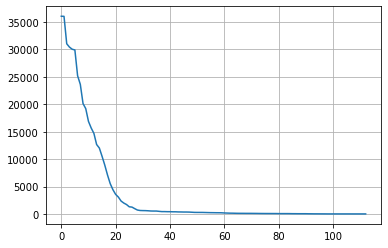

In [23]:
plt.plot(range(len(year)), year)
plt.grid()

In [24]:
for x in ['year']:
    q75, q25 = np.percentile(prepped_cars.loc[:,x], [75,25])
    intr_qr = q75-q25
    
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    
    prepped_cars.loc[prepped_cars[x] < min, x] = np.nan
    prepped_cars.loc[prepped_cars[x] > max, x] = np.nan

In [25]:
prepped_cars['year'].value_counts()

5.0     36062
4.0     36044
7.0     31041
9.0     30436
6.0     30048
8.0     29910
3.0     25214
10.0    23631
11.0    20130
2.0     19208
14.0    16882
12.0    15675
15.0    14693
16.0    12660
13.0    12020
17.0    10512
18.0     8909
19.0     7112
20.0     5526
21.0     4417
22.0     3562
23.0     3074
1.0      2348
24.0     1982
25.0     1712
26.0     1301
27.0     1245
0.0       133
Name: year, dtype: int64

In [26]:
odom = prepped_cars['odometer'].value_counts()
odom

100000.0    2263
1.0         2239
0.0         1943
200000.0    1728
150000.0    1603
            ... 
48222.0        1
134077.0       1
272275.0       1
26213.0        1
107019.0       1
Name: odometer, Length: 104630, dtype: int64

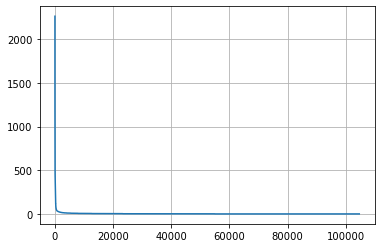

In [27]:
plt.plot(range(len(odom)), odom)
plt.grid()

In [28]:
for x in ['odometer']:
    q75, q25 = np.percentile(prepped_cars.loc[:,x], [75,25])
    intr_qr = q75-q25
    
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    
    prepped_cars.loc[prepped_cars[x] < min, x] = np.nan
    prepped_cars.loc[prepped_cars[x] > max, x] = np.nan

In [29]:
prepped_cars['odometer'].value_counts()

100000.0    2263
1.0         2239
0.0         1943
200000.0    1728
150000.0    1603
            ... 
233788.0       1
107571.0       1
150799.0       1
100862.0       1
251647.0       1
Name: odometer, Length: 103032, dtype: int64

In [30]:
price = prepped_cars['price'].value_counts()
price

0        30759
6995      3153
7995      3119
9995      2847
8995      2826
         ...  
40880        1
8251         1
37165        1
26930        1
31677        1
Name: price, Length: 15508, dtype: int64

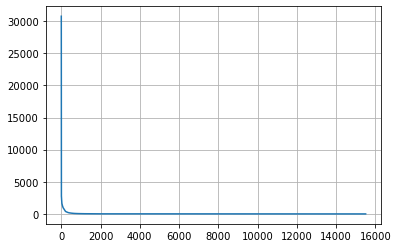

In [31]:
plt.plot(range(len(price)), price)
plt.grid()

In [32]:
for x in ['price']:
    q75, q25 = np.percentile(prepped_cars.loc[:,x], [75,25])
    intr_qr = q75-q25
    
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    
    prepped_cars.loc[prepped_cars[x] < min, x] = np.nan
    prepped_cars.loc[prepped_cars[x] > max, x] = np.nan

In [33]:
prepped_cars['price'].value_counts()

0.0        30759
6995.0      3153
7995.0      3119
9995.0      2847
8995.0      2826
           ...  
23289.0        1
23809.0        1
28001.0        1
6380.0         1
18182.0        1
Name: price, Length: 14332, dtype: int64

In [34]:
prepped_cars.isnull().sum()

region               0
price             7923
year             15857
manufacturer     16267
model             5195
condition       170493
cylinders       174759
fuel              2172
odometer          4354
title_status      7358
transmission      1695
drive           128849
type             91782
paint_color     128090
state                0
dtype: int64

In [35]:
prepped_cars.drop(prepped_cars[prepped_cars['price'] == 0].index, inplace = True)

In [36]:
prepped_cars = prepped_cars.dropna(subset = ['year', 'odometer', 'price'])
prepped_cars.isnull().sum()

region               0
price                0
year                 0
manufacturer     11176
model             3047
condition       139047
cylinders       149425
fuel              2075
odometer             0
title_status      6973
transmission      1430
drive           110960
type             76135
paint_color     106918
state                0
dtype: int64

In [37]:
prepped_cars.year = prepped_cars.year.astype(int)
prepped_cars.odometer = prepped_cars.odometer.astype(int)
prepped_cars.price = prepped_cars.price.astype(int)

In [38]:
prepped_cars.describe()

price           year       odometer
count  364068.000000  364068.000000  364068.000000
mean    17983.565784       9.553825   92413.316301
std     12755.816108       5.475248   60617.557145
min         1.000000       0.000000       0.000000
25%      7300.000000       5.000000   39588.750000
50%     15000.000000       9.000000   88672.500000
75%     26990.000000      13.000000  135383.000000
max     57112.000000      27.000000  277542.000000

In [39]:
prepped_cars.shape

(364068, 15)

# Categorical Data

In [41]:
prepped_cars.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [42]:
region = prepped_cars['region'].value_counts()
region

columbus               3211
jacksonville           2993
grand rapids           2810
milwaukee              2775
central NJ             2775
                       ... 
meridian                 17
southwest MS             12
kansas city               9
fort smith, AR            8
west virginia (old)       8
Name: region, Length: 404, dtype: int64

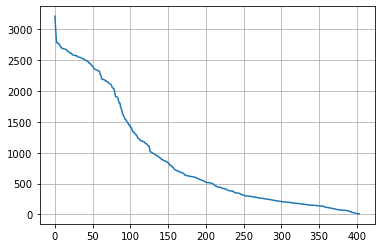

In [43]:
plt.plot(range(len(region)), region)
plt.grid()

In [44]:
prepped_cars['region'] = prepped_cars['region'].apply(lambda s: s if str(s) in region[:59] else 'others')

In [45]:
region2 = prepped_cars['region'].value_counts()
region2

others                     212174
columbus                     3211
jacksonville                 2993
grand rapids                 2810
milwaukee                    2775
central NJ                   2775
new hampshire                2768
tampa bay area               2748
detroit metro                2734
sarasota-bradenton           2707
nashville                    2693
kansas city, MO              2693
south jersey                 2683
boston                       2680
north jersey                 2679
orlando                      2679
new york city                2671
rochester                    2656
ft myers / SW florida        2643
st louis, MO                 2636
chicago                      2625
denver                       2618
baltimore                    2615
cleveland                    2608
maine                        2586
des moines                   2582
pittsburgh                   2579
minneapolis / st paul        2578
south florida                2576
omaha / counci

In [46]:
man = prepped_cars['manufacturer'].value_counts()
man

ford               58663
chevrolet          44677
toyota             30246
honda              19387
nissan             17064
jeep               16480
ram                15148
gmc                13835
bmw                13426
dodge              11590
mercedes-benz       9437
hyundai             9301
subaru              8907
volkswagen          8330
lexus               7604
kia                 7521
audi                6909
cadillac            6072
acura               5634
chrysler            5462
mazda               4897
buick               4872
infiniti            4450
lincoln             3800
mitsubishi          3030
volvo               2997
mini                2241
rover               1805
jaguar              1803
pontiac             1766
porsche             1062
saturn              1060
mercury              951
alfa-romeo           816
tesla                755
fiat                 737
harley-davidson      129
aston-martin          11
land rover            10
ferrari                5


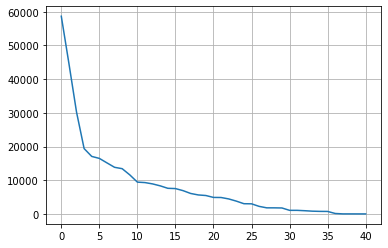

In [47]:
plt.plot(range(len(man)), man)
plt.grid()

In [48]:
prepped_cars['manufacturer'] = prepped_cars['manufacturer'].apply(lambda s: s if str(s) in man[:12] else 'others')

In [49]:
man2 = prepped_cars['manufacturer'].value_counts()
man2

others           104814
ford              58663
chevrolet         44677
toyota            30246
honda             19387
nissan            17064
jeep              16480
ram               15148
gmc               13835
bmw               13426
dodge             11590
mercedes-benz      9437
hyundai            9301
Name: manufacturer, dtype: int64

In [50]:
model = prepped_cars['model'].value_counts()
model

f-150                       6736
silverado 1500              4348
1500                        3700
camry                       2755
accord                      2647
                            ... 
7400                           1
mdx sh awd tech                1
soul + hatchback               1
500e battery electric          1
3 series 328d xdrive awd       1
Name: model, Length: 23435, dtype: int64

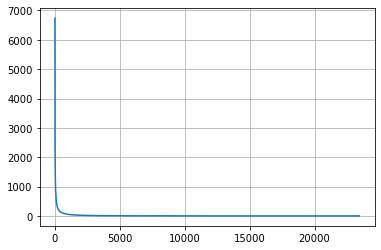

In [51]:
plt.plot(range(len(model)), model)
plt.grid()

In [52]:
prepped_cars['model'] = prepped_cars['model'].apply(lambda s: s if str(s) in model[:99] else 'others')

In [53]:
model2 = prepped_cars['model'].value_counts()
model2

others            240917
f-150               6736
silverado 1500      4348
1500                3700
camry               2755
                   ...  
patriot              599
cts                  566
compass              560
frontier             559
328i                 553
Name: model, Length: 100, dtype: int64

In [40]:
prepped_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364068 entries, 0 to 421343
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        364068 non-null  object
 1   price         364068 non-null  int64 
 2   year          364068 non-null  int64 
 3   manufacturer  352892 non-null  object
 4   model         361021 non-null  object
 5   condition     225021 non-null  object
 6   cylinders     214643 non-null  object
 7   fuel          361993 non-null  object
 8   odometer      364068 non-null  int64 
 9   title_status  357095 non-null  object
 10  transmission  362638 non-null  object
 11  drive         253108 non-null  object
 12  type          287933 non-null  object
 13  paint_color   257150 non-null  object
 14  state         364068 non-null  object
dtypes: int64(3), object(12)
memory usage: 44.4+ MB


# Data Visualization 

<AxesSubplot:>

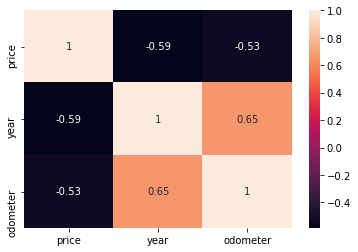

In [54]:
sns.heatmap(prepped_cars.corr(), annot = True)

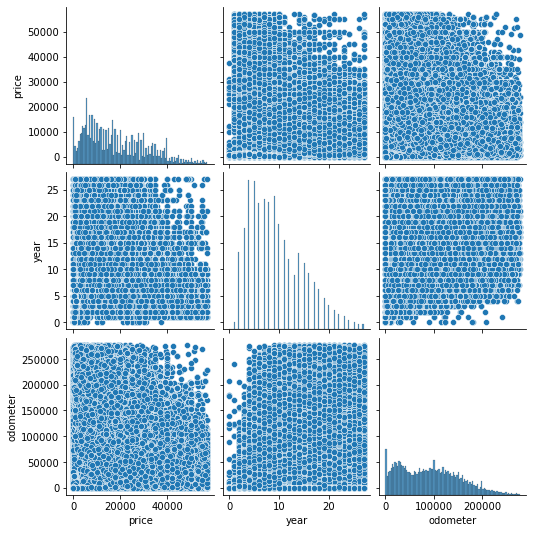

In [55]:
sns.pairplot(data = prepped_cars)

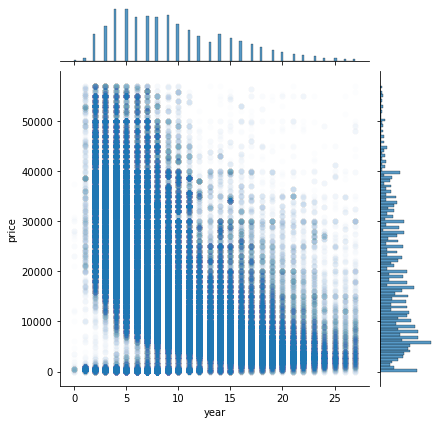

In [56]:
sns.jointplot(data = prepped_cars, x = 'year', y = 'price', alpha = 0.01)

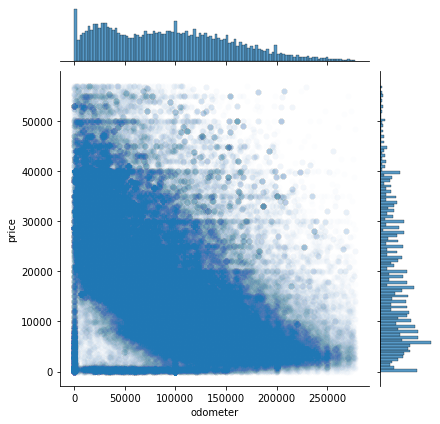

In [57]:
sns.jointplot(data = prepped_cars, x = 'odometer', y = 'price', alpha = 0.01)

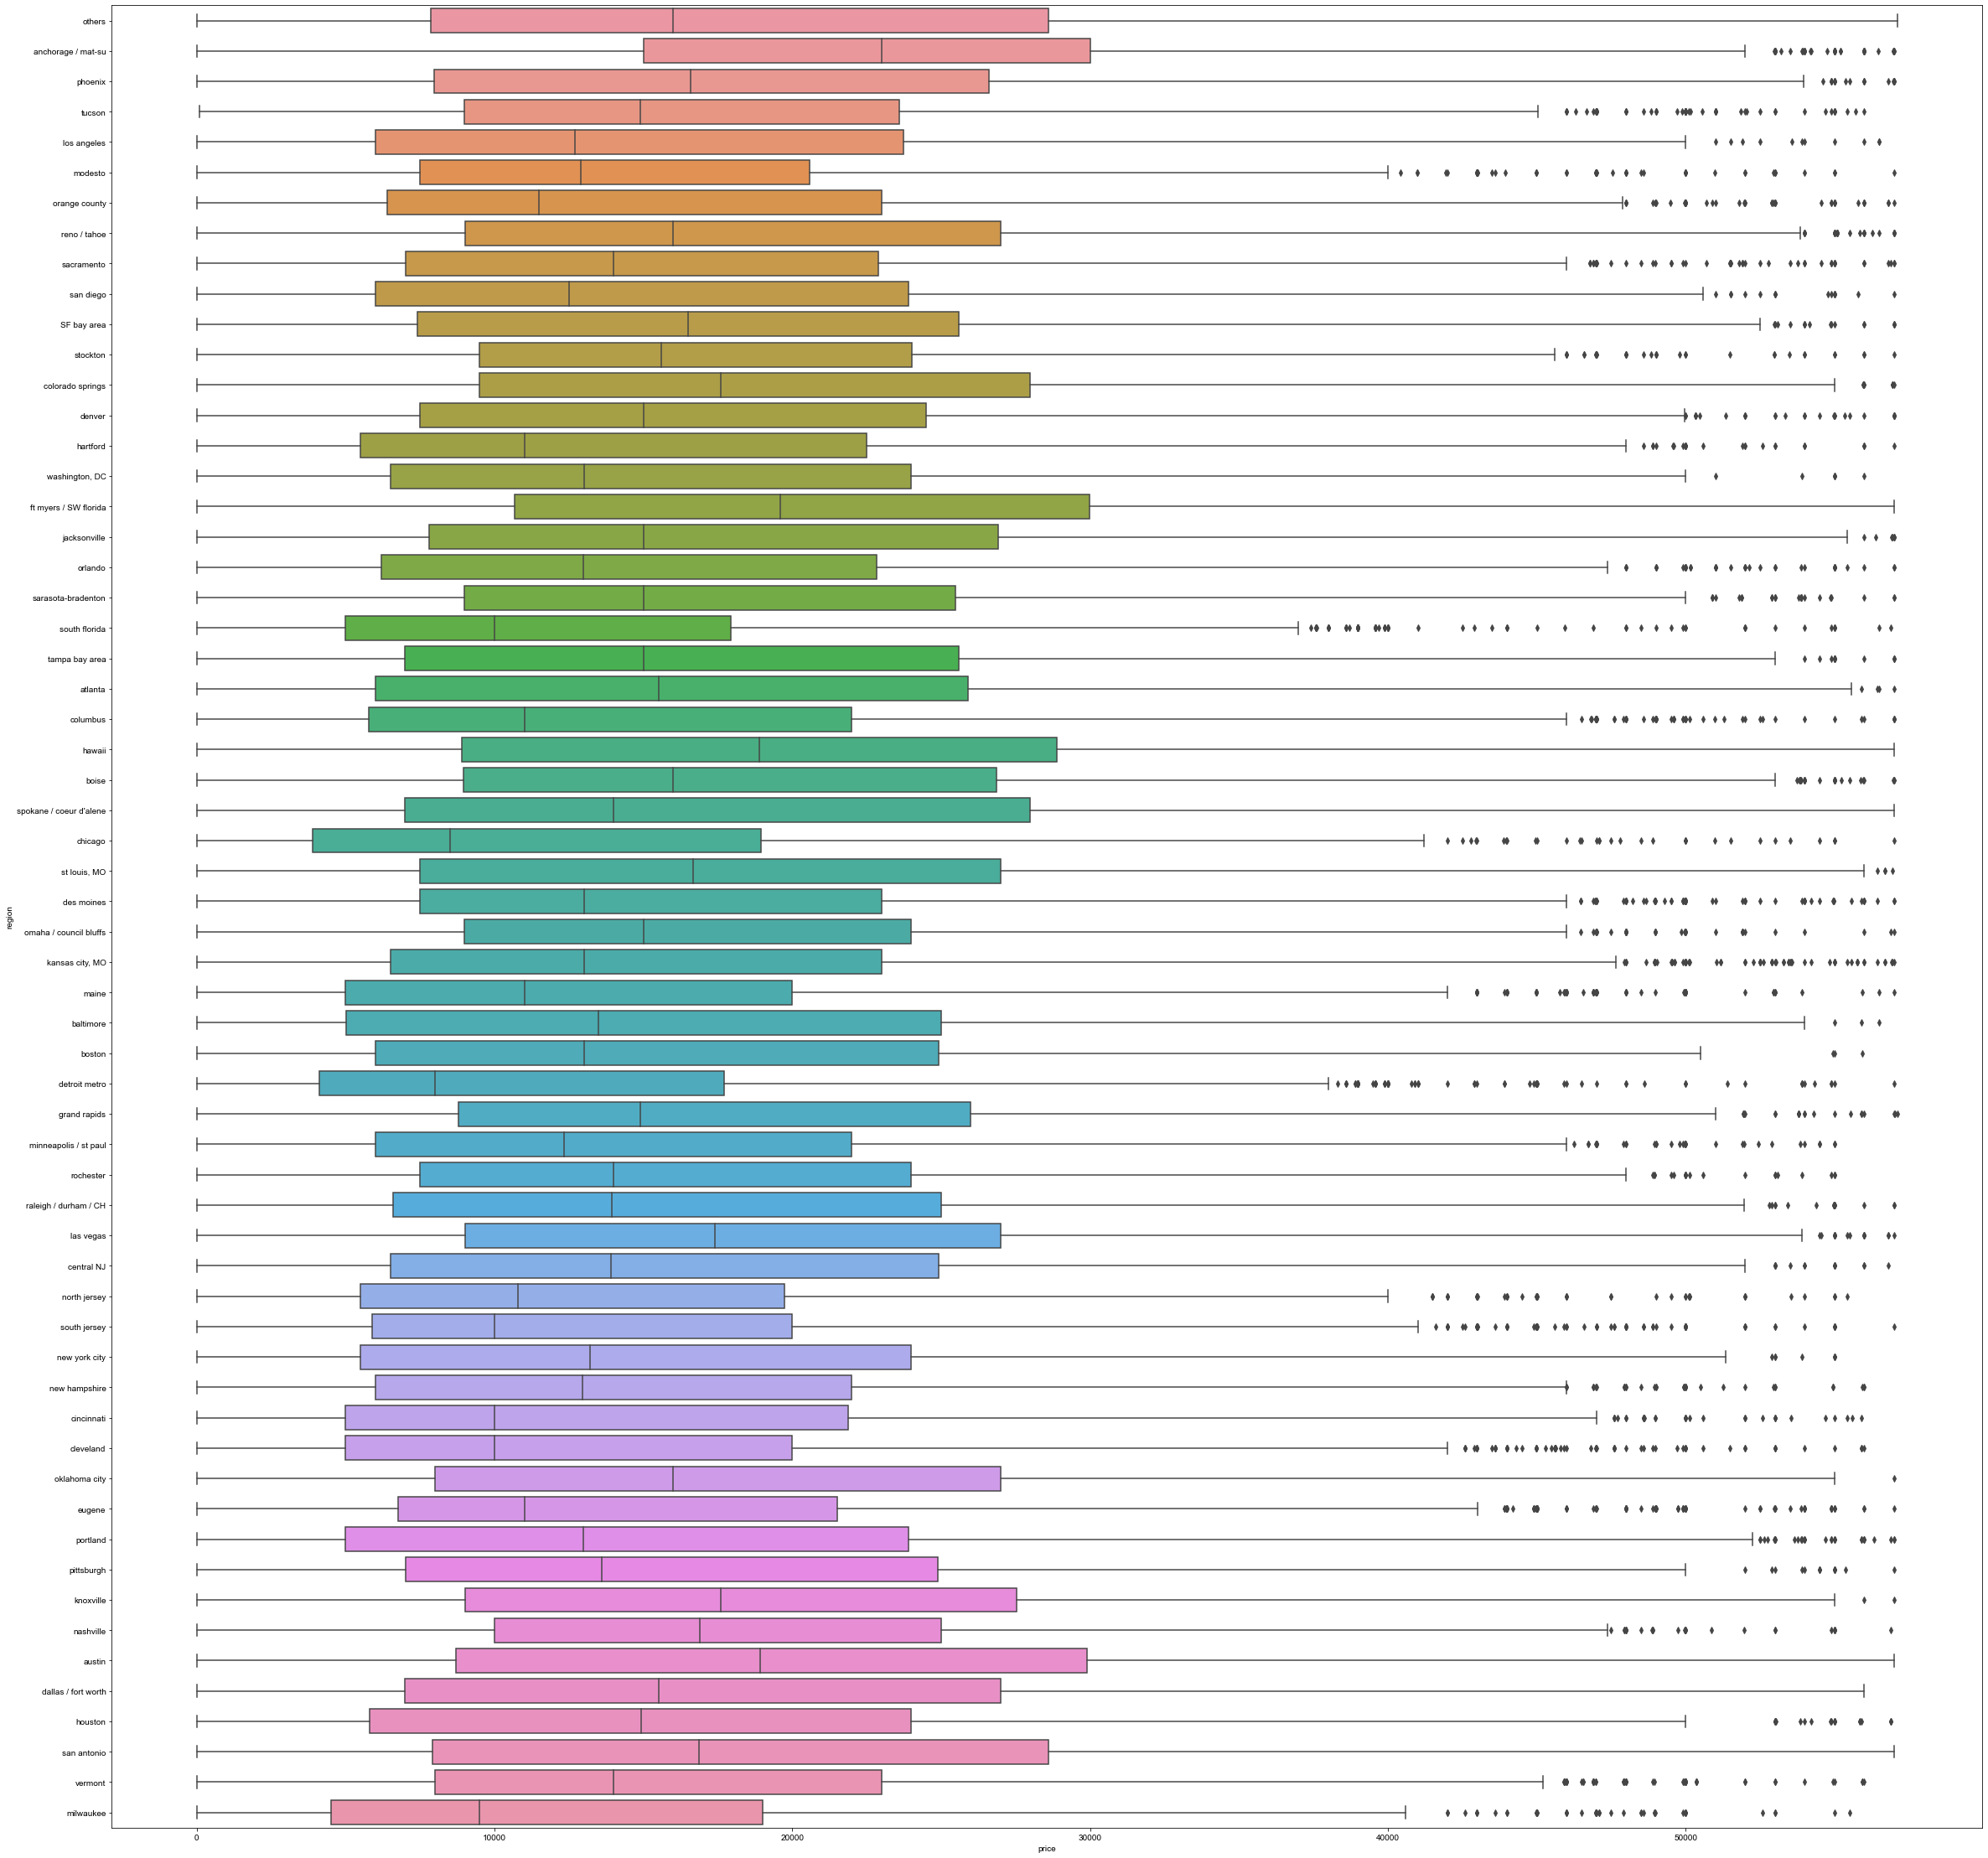

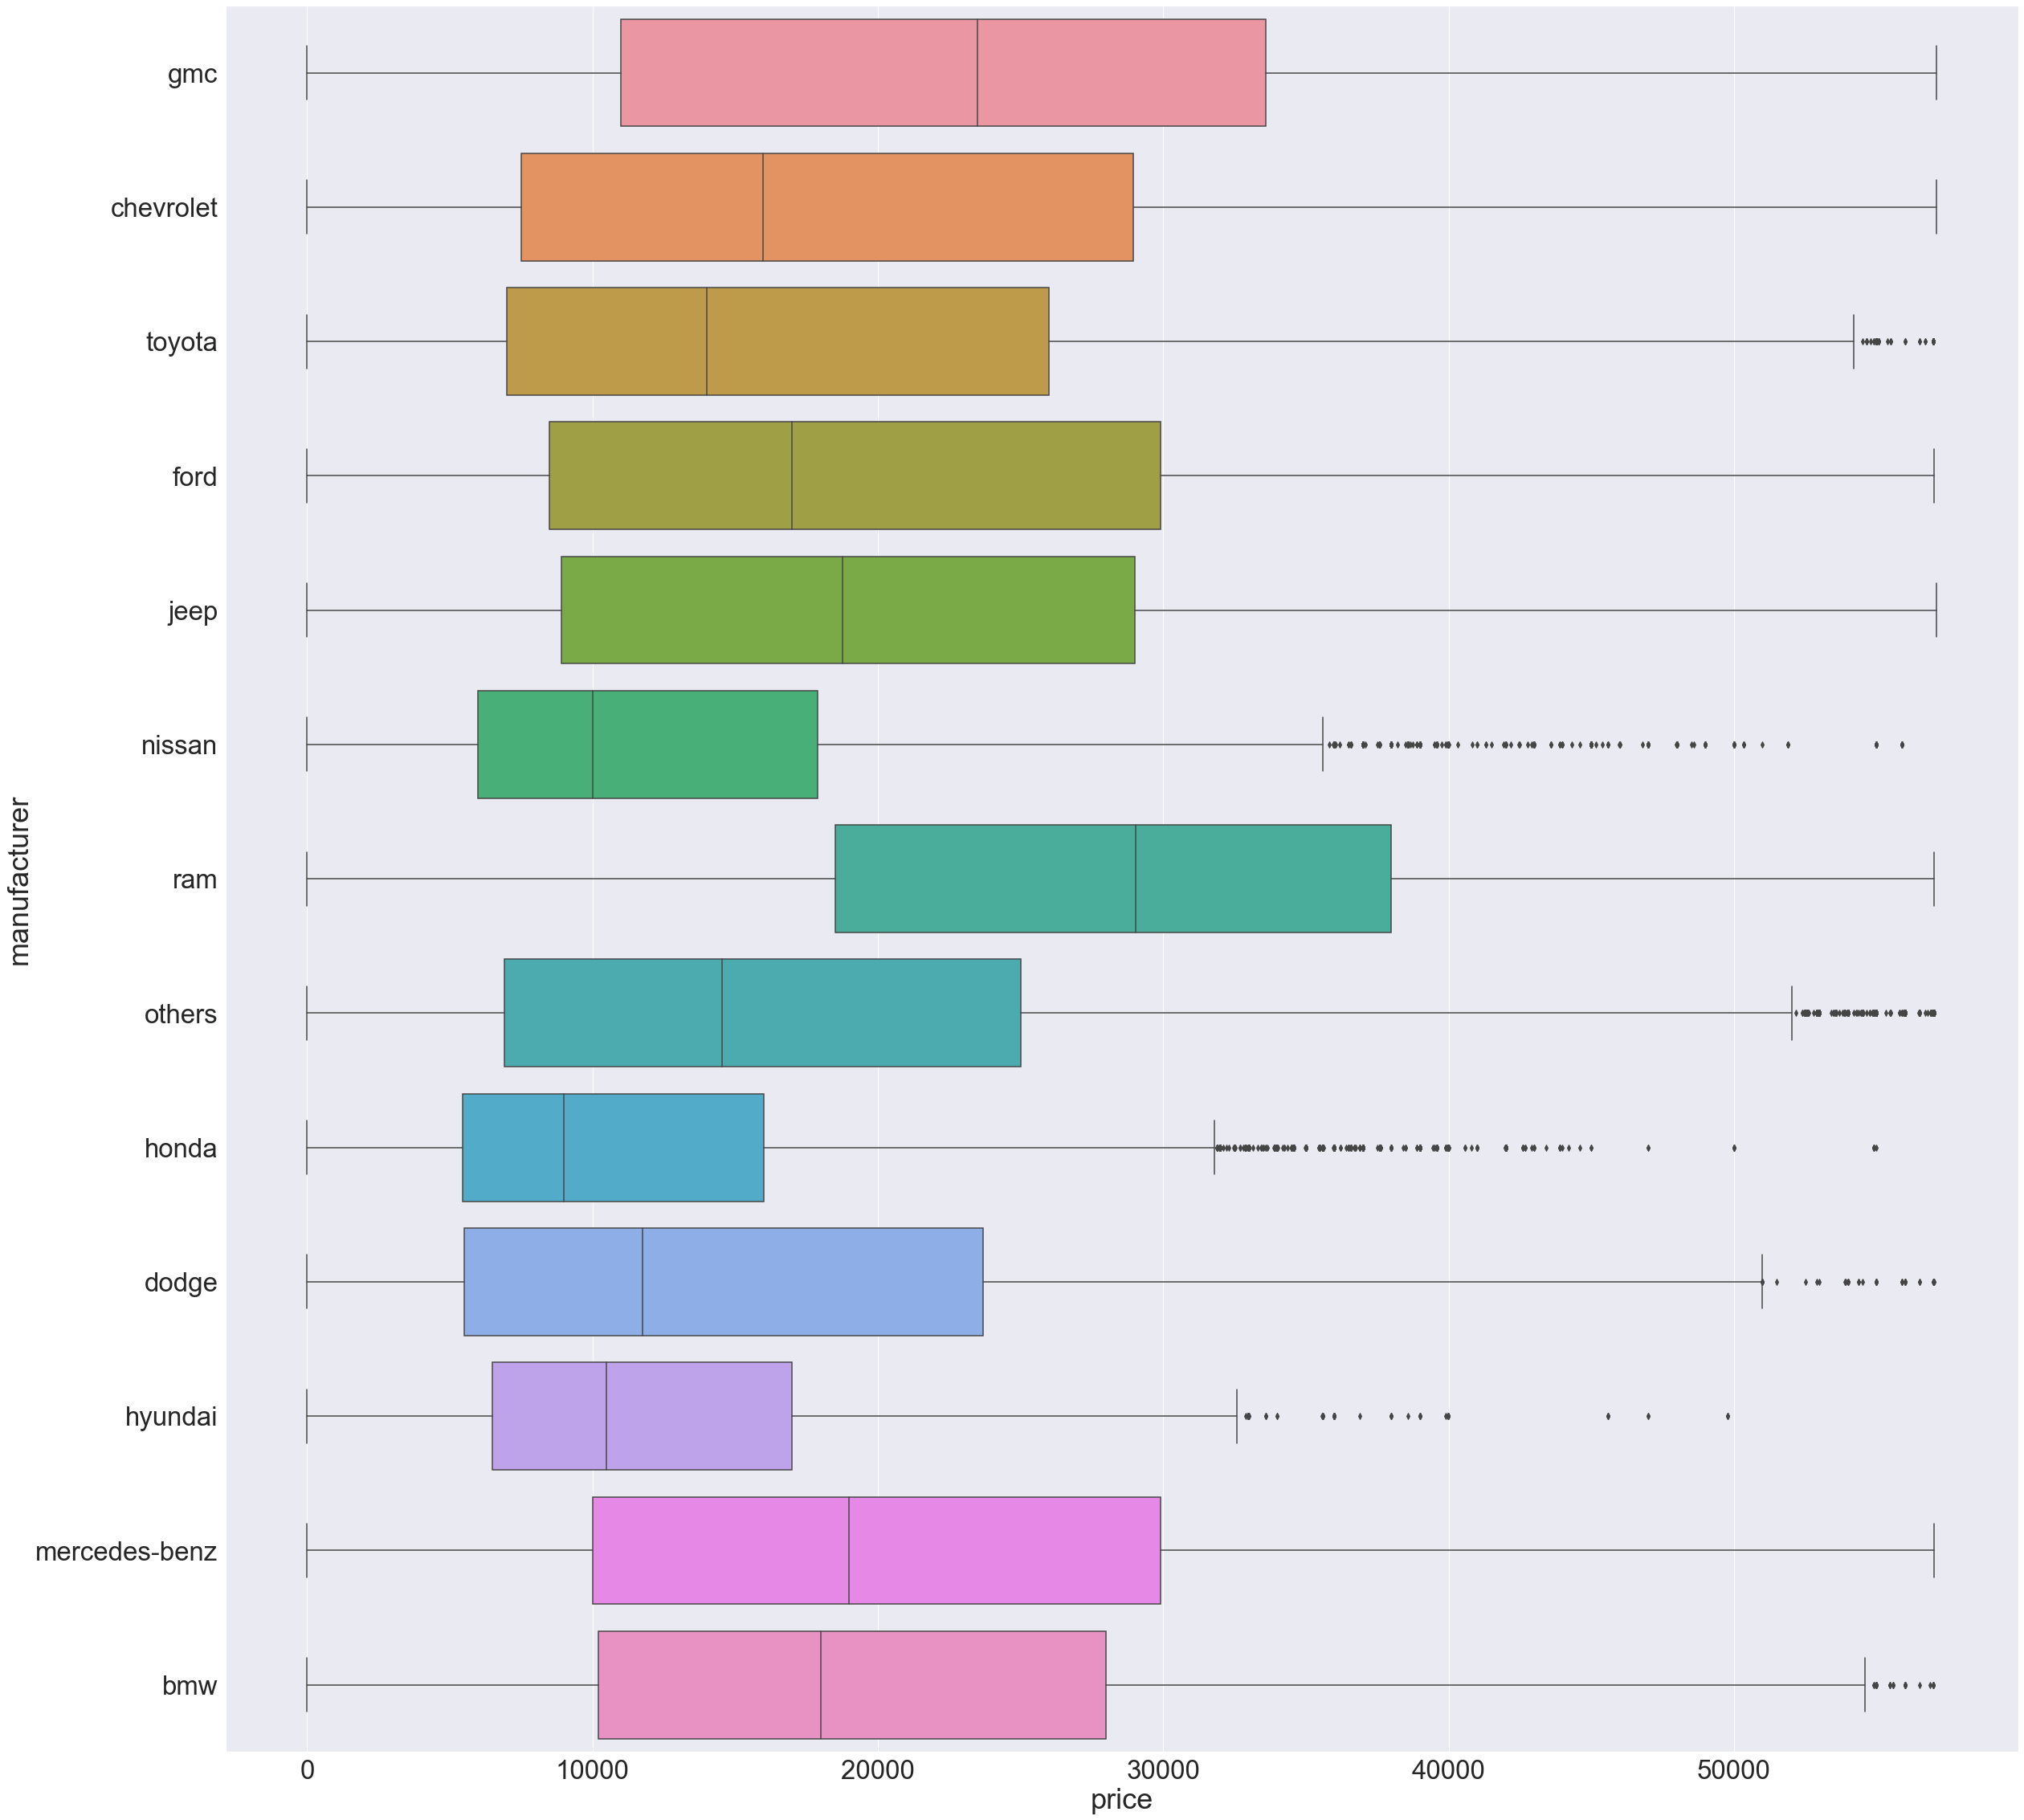

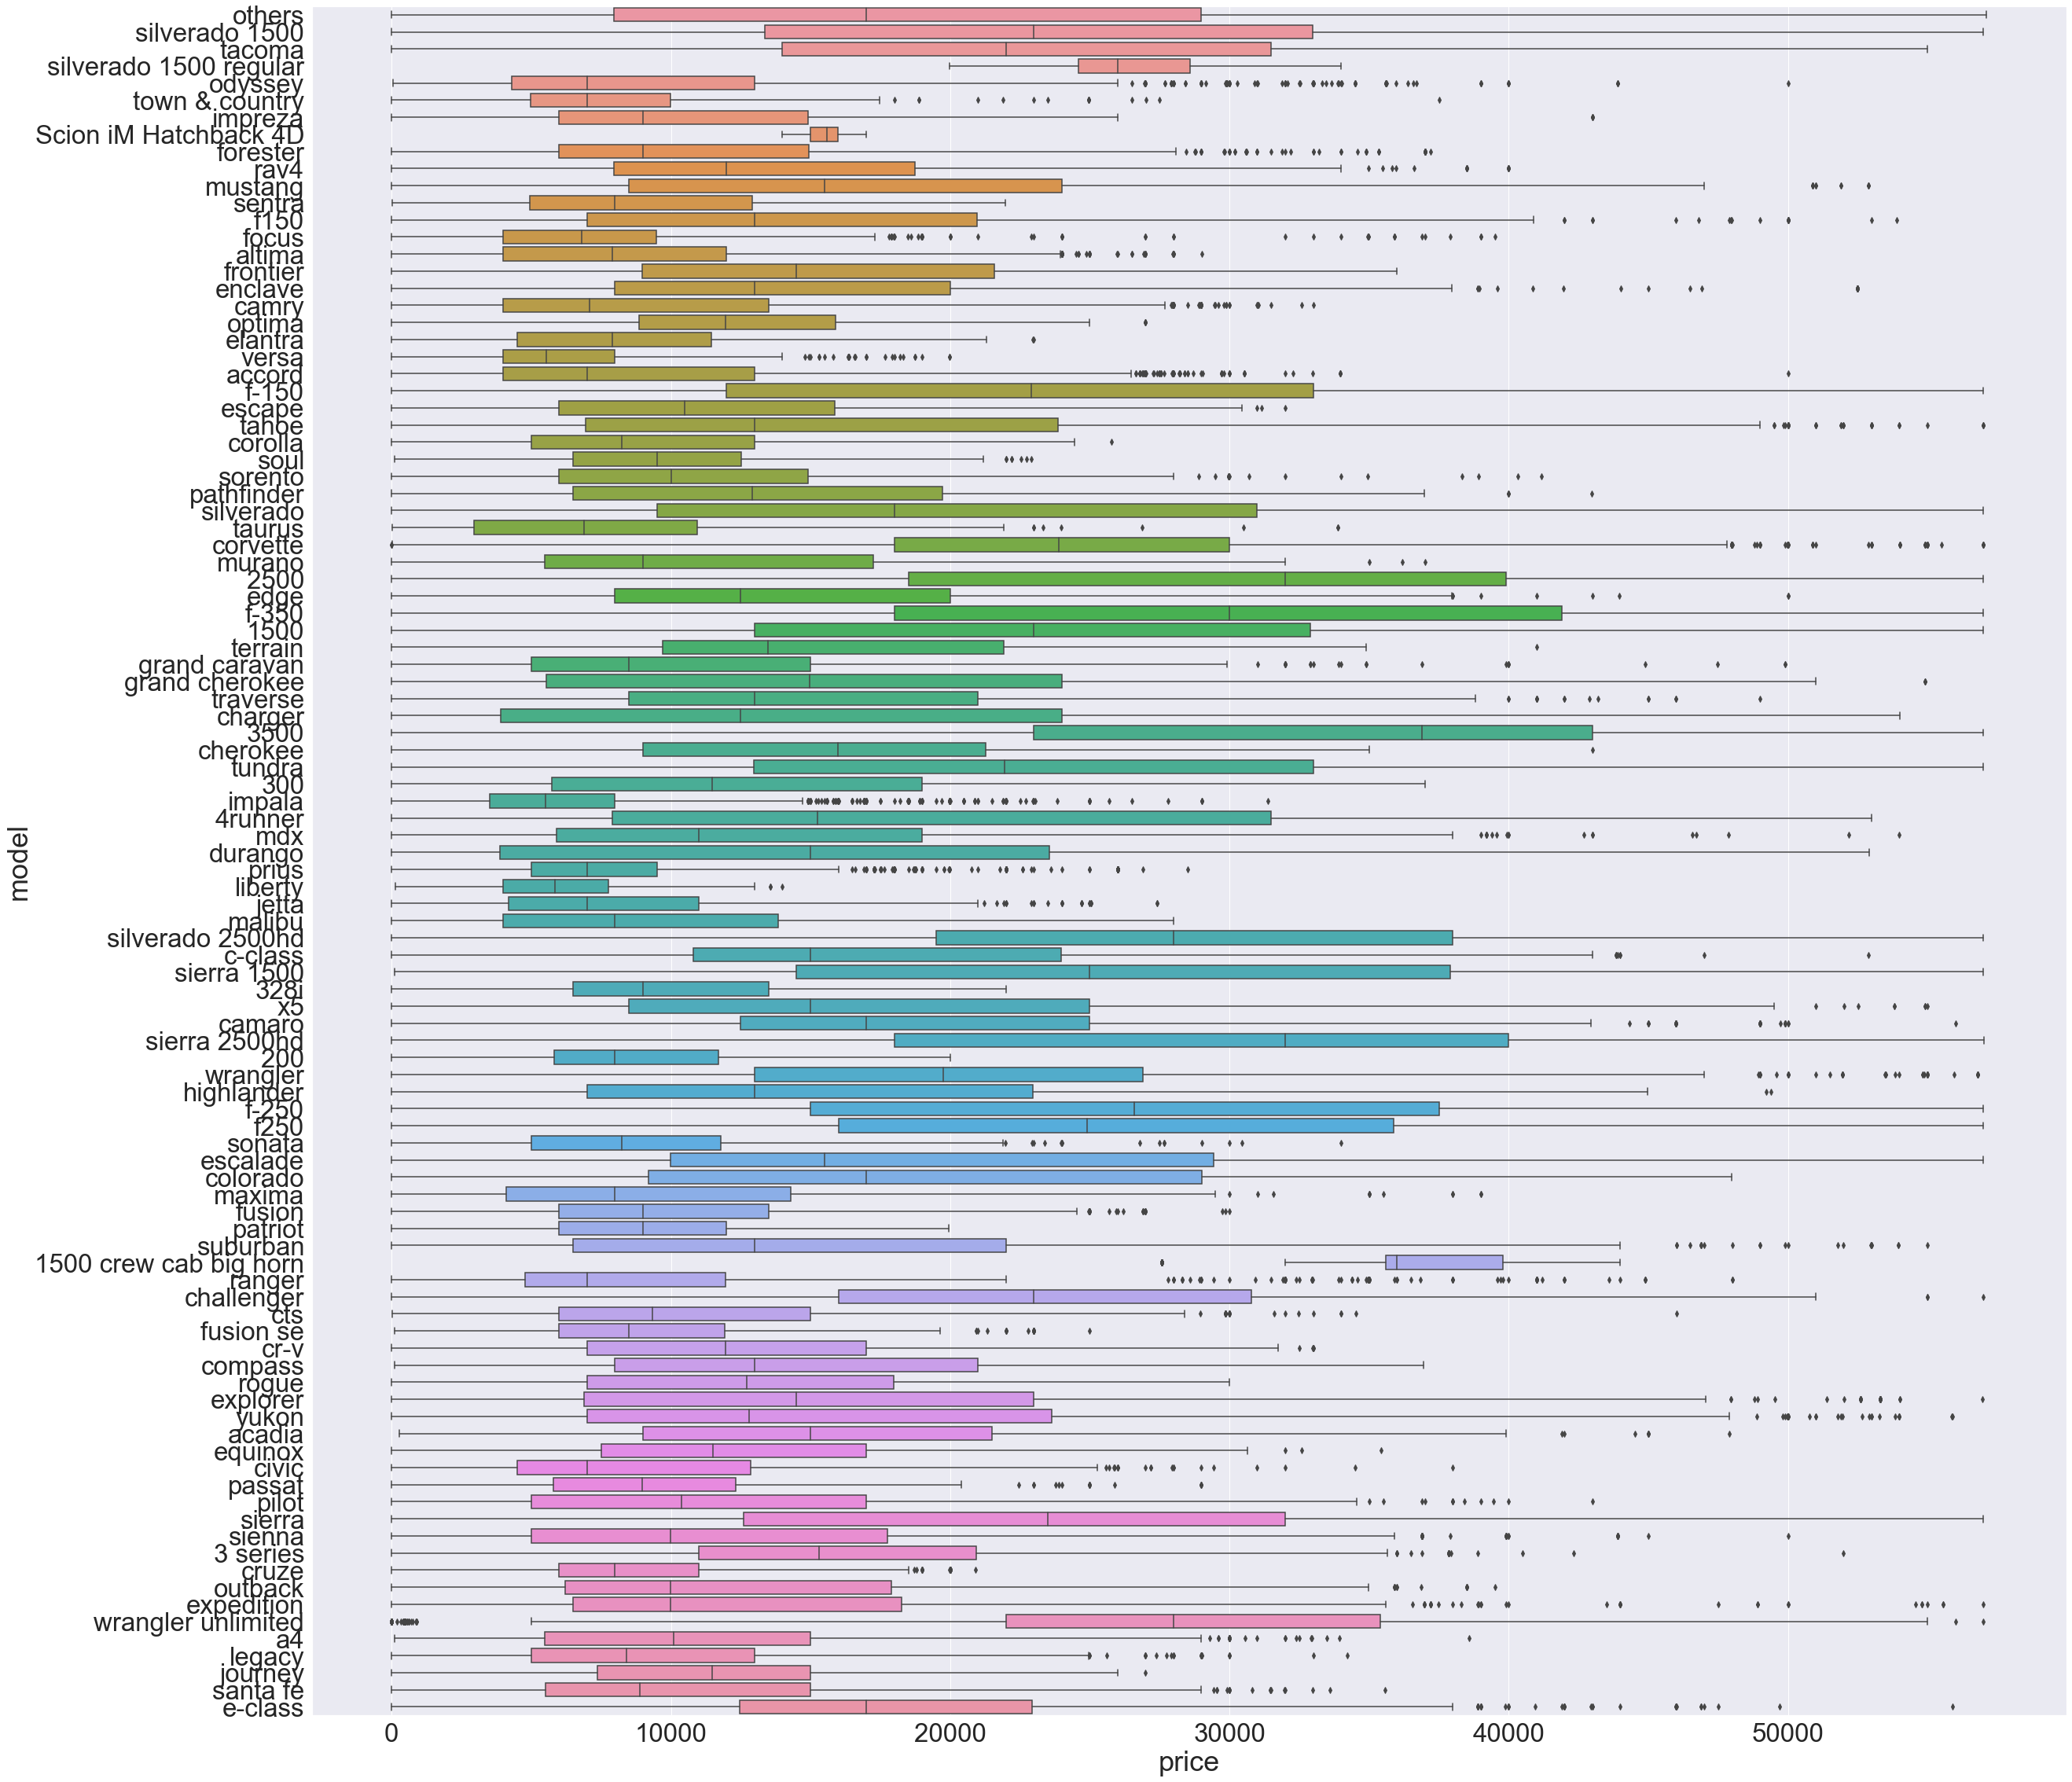

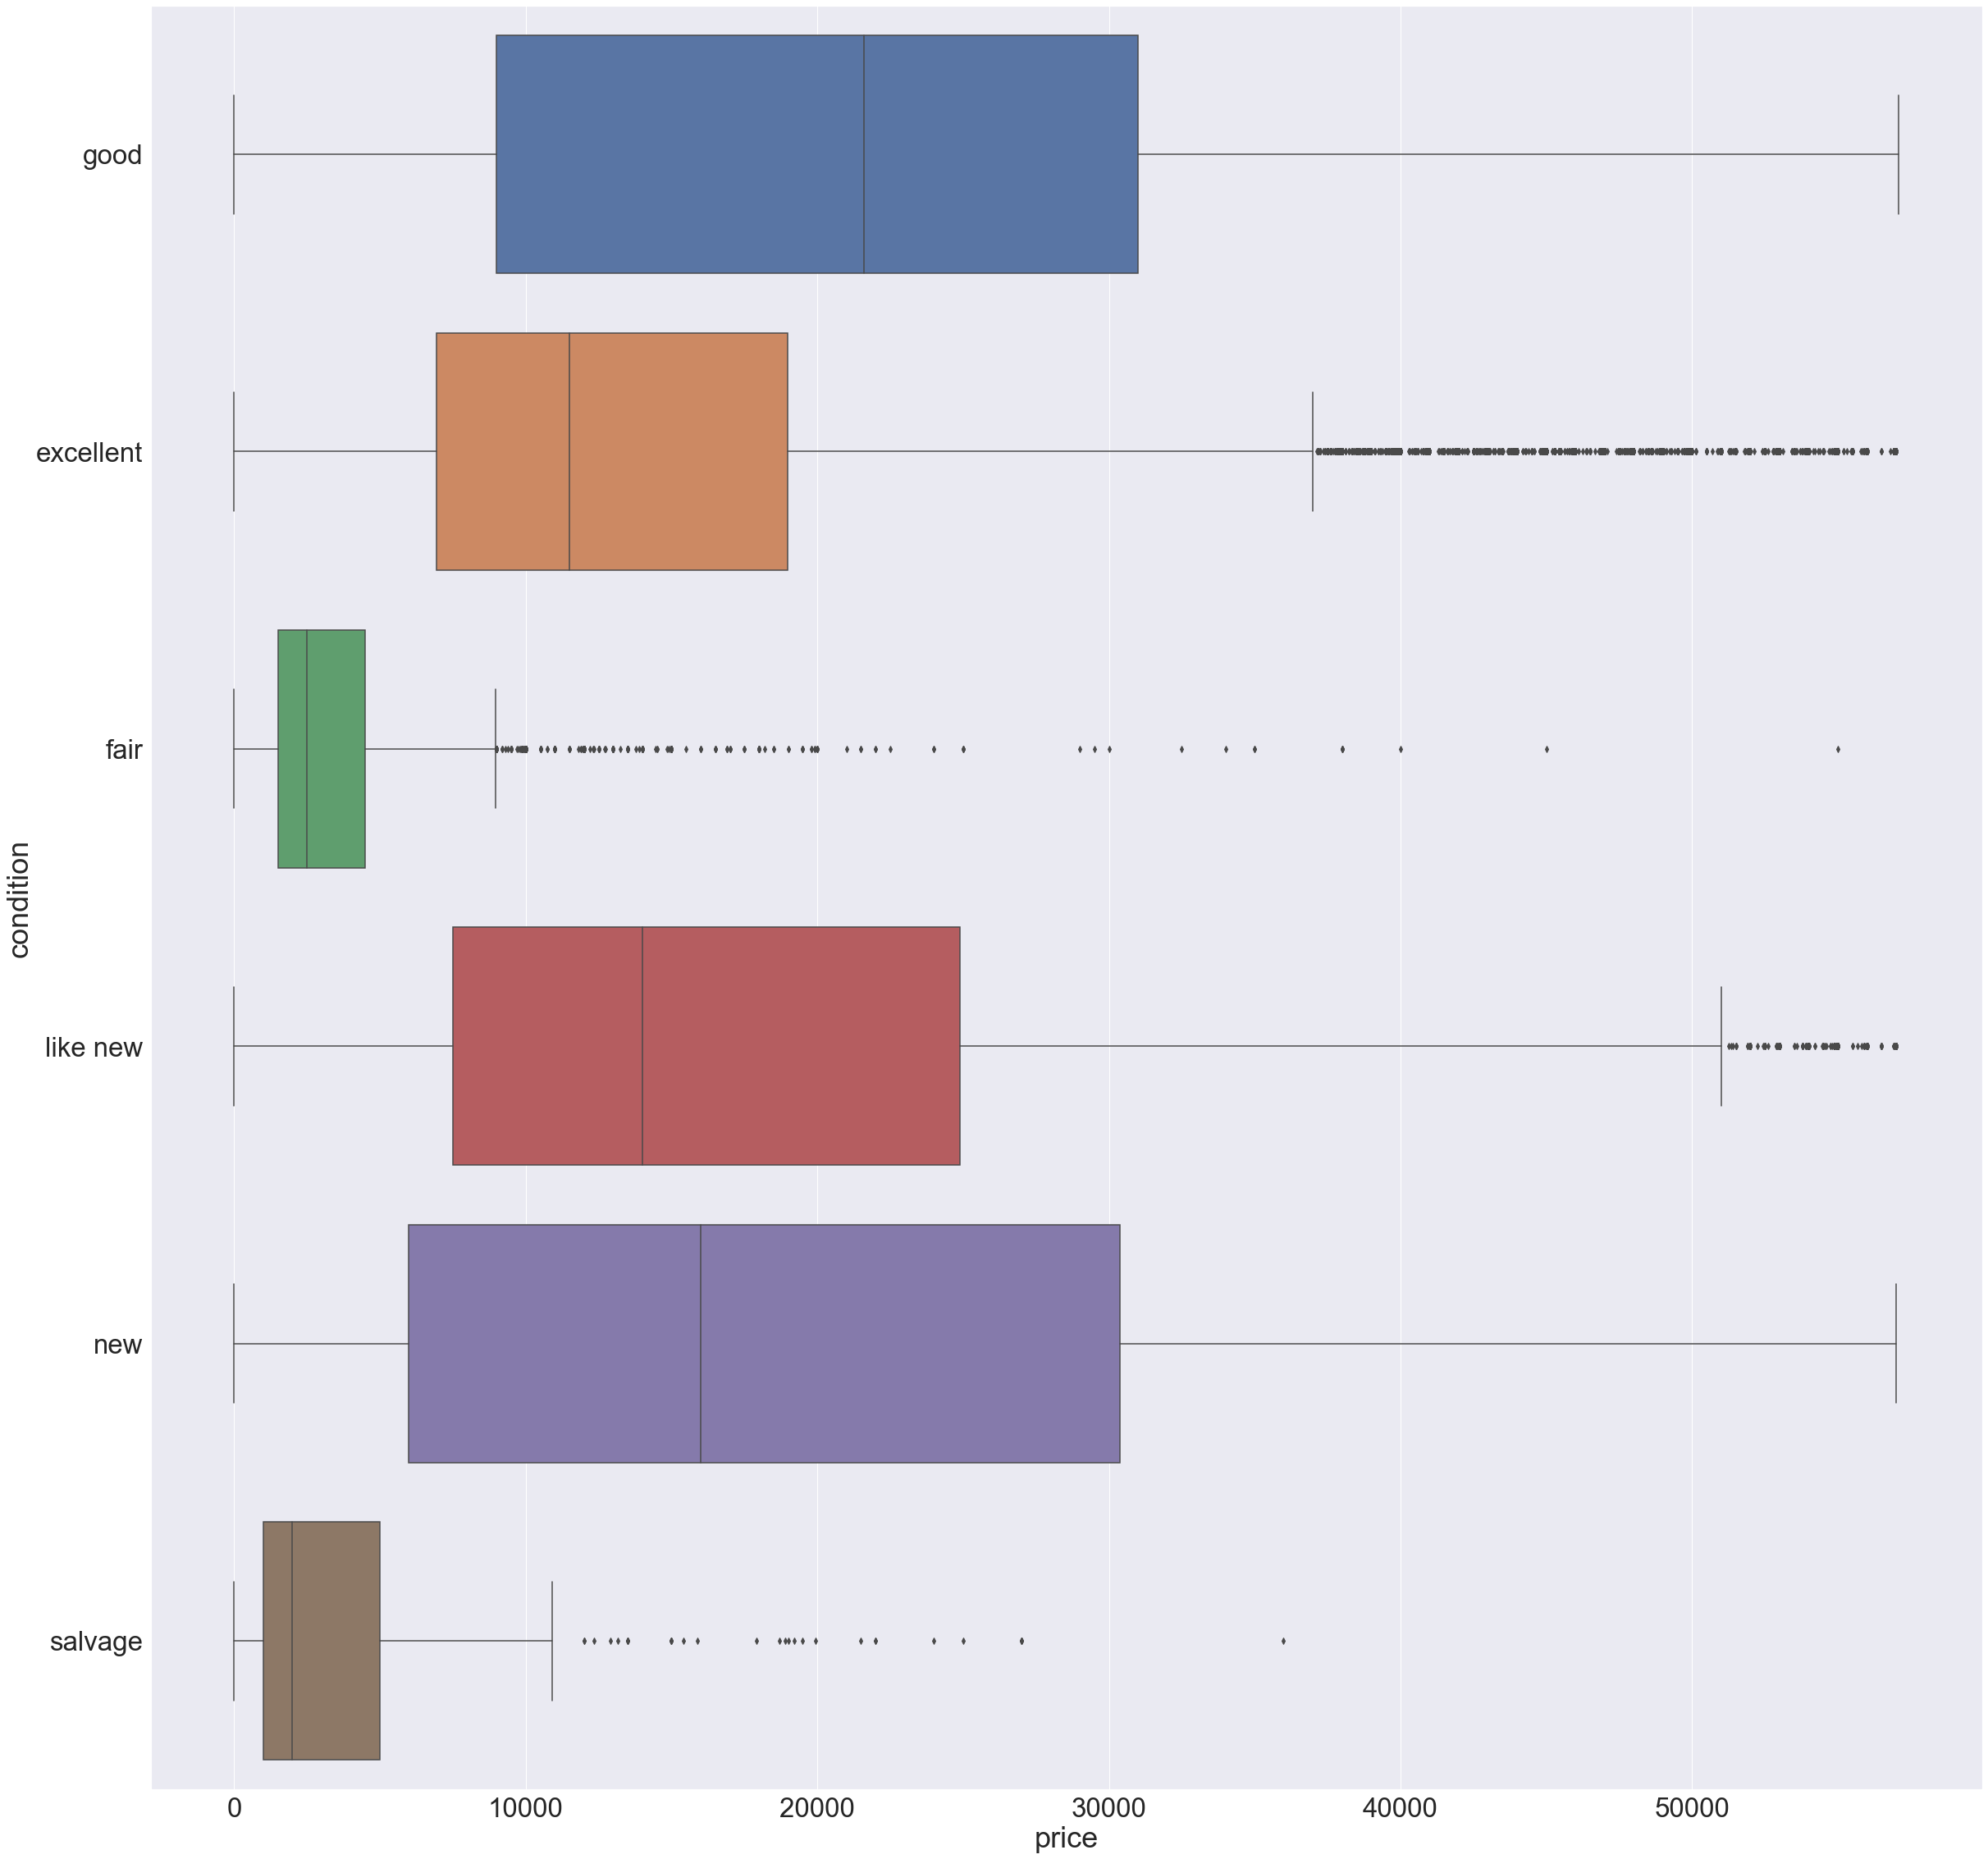

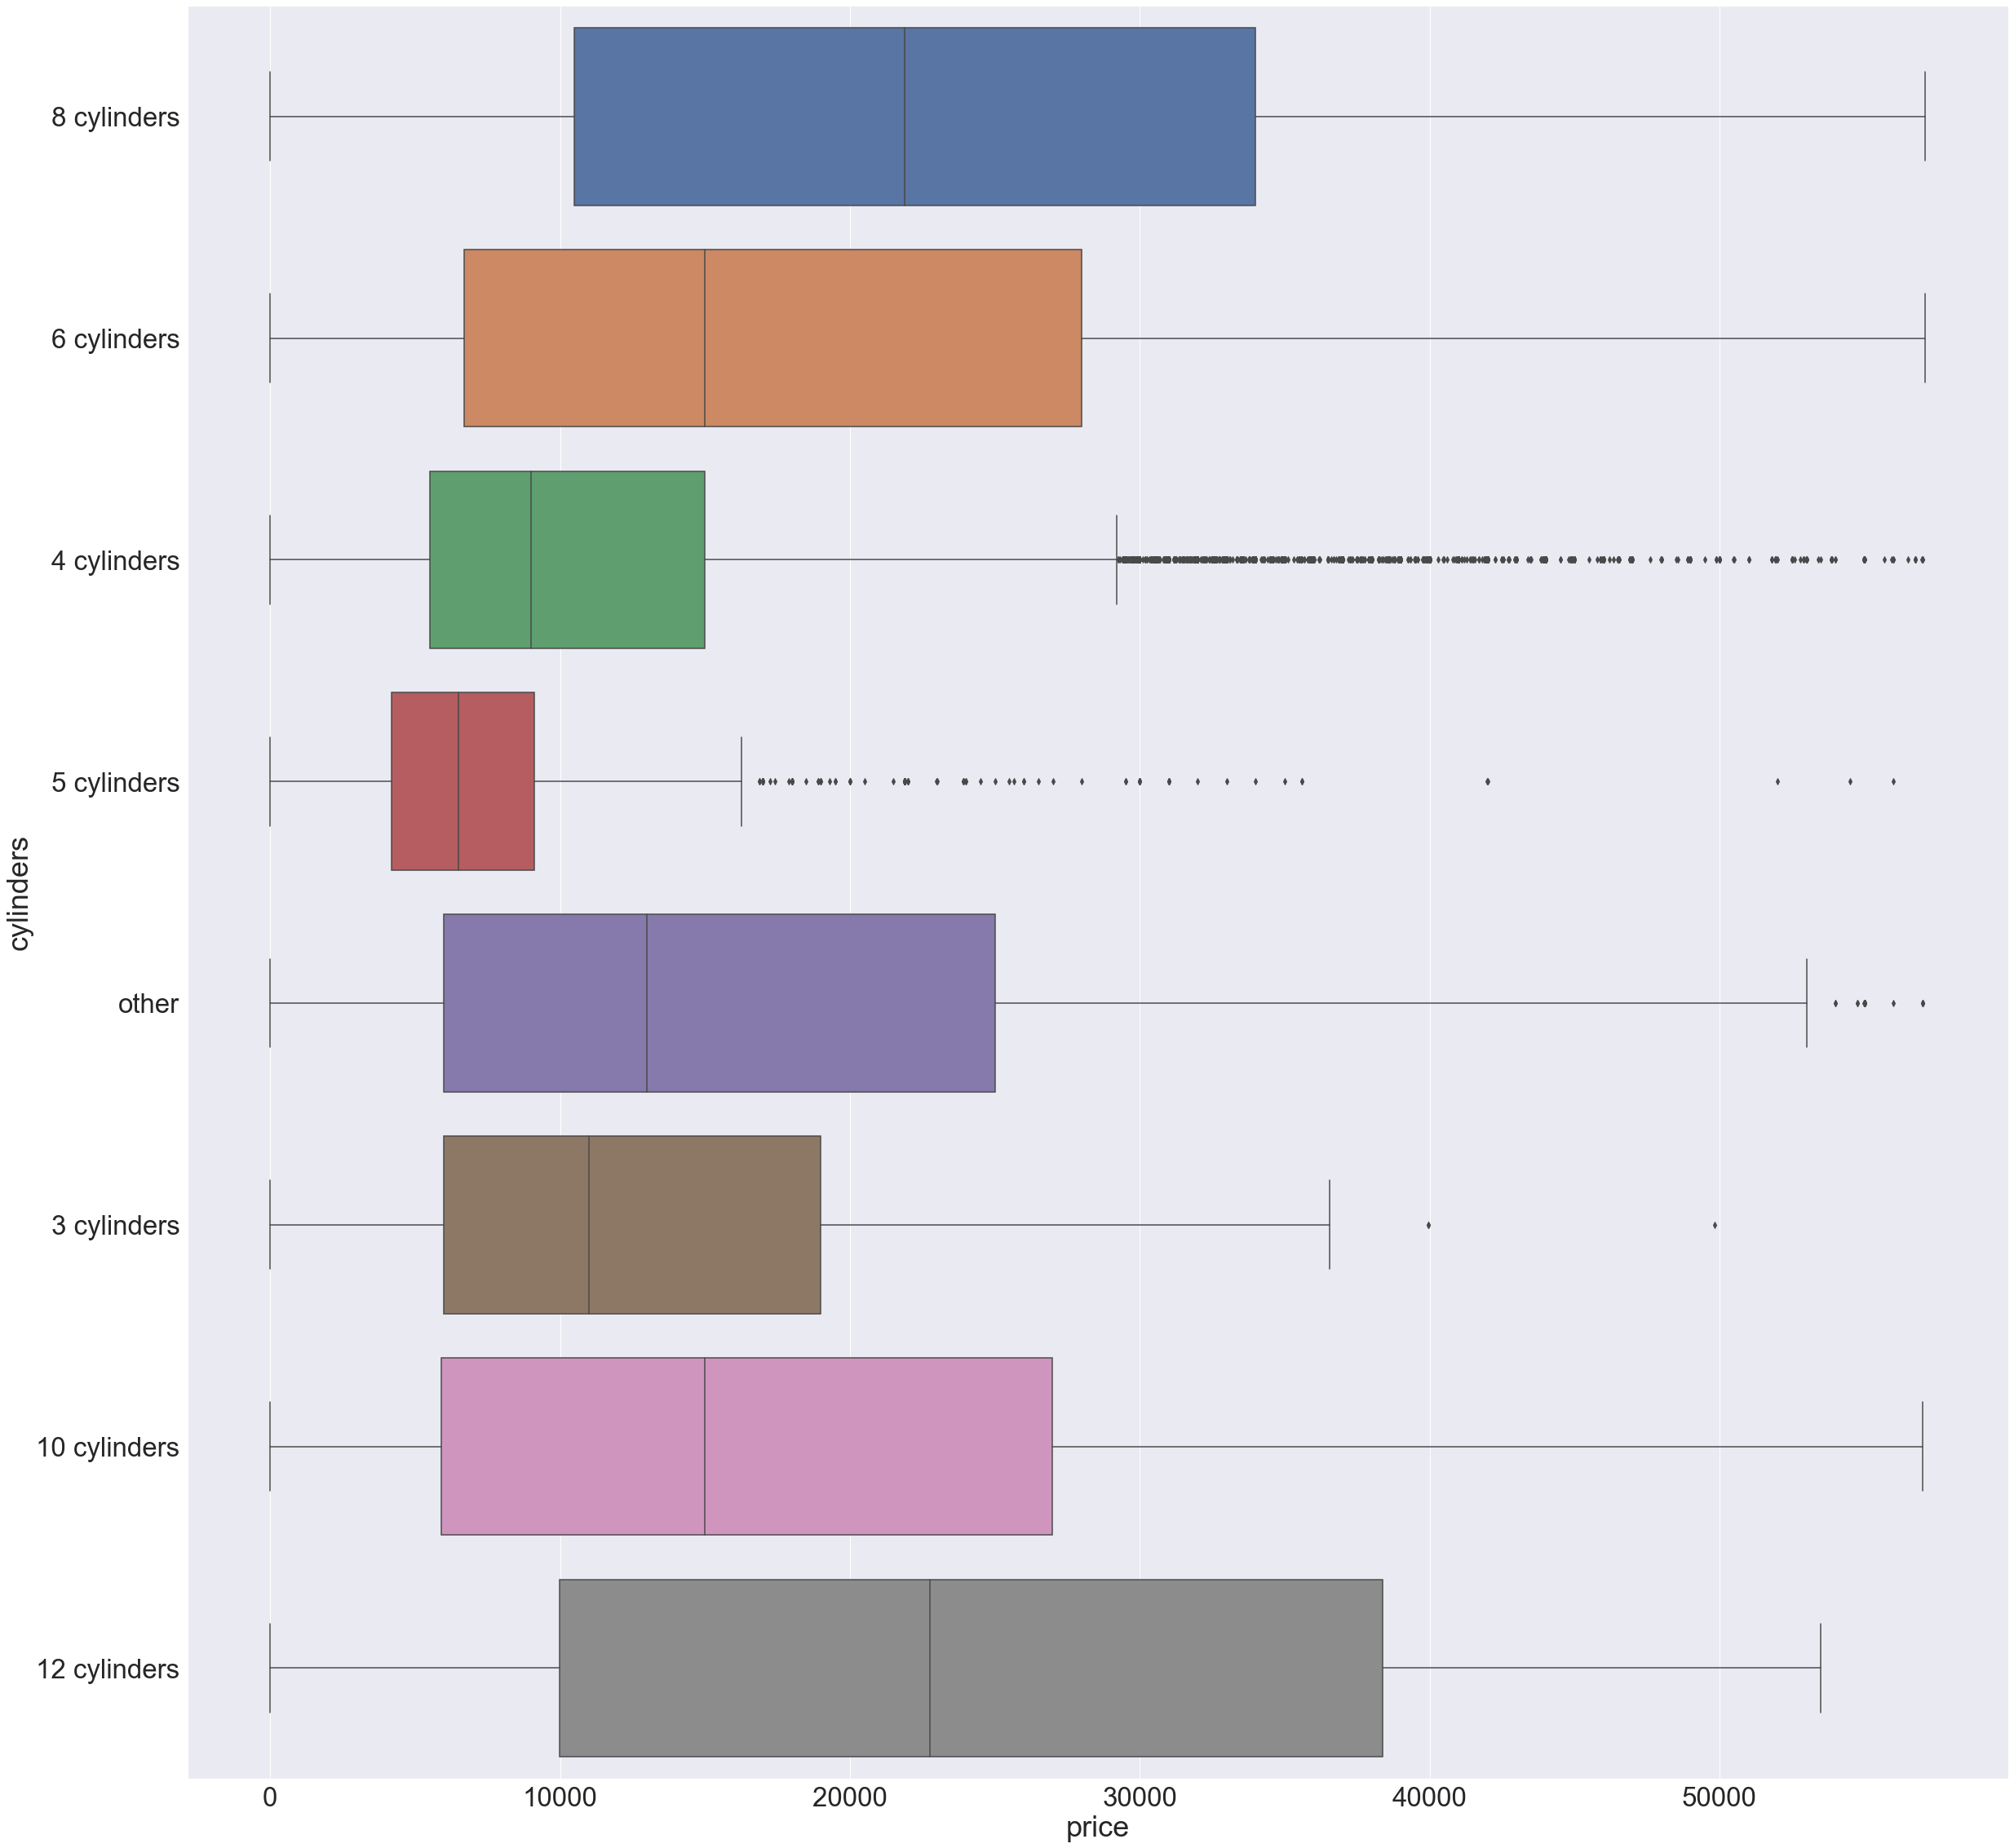

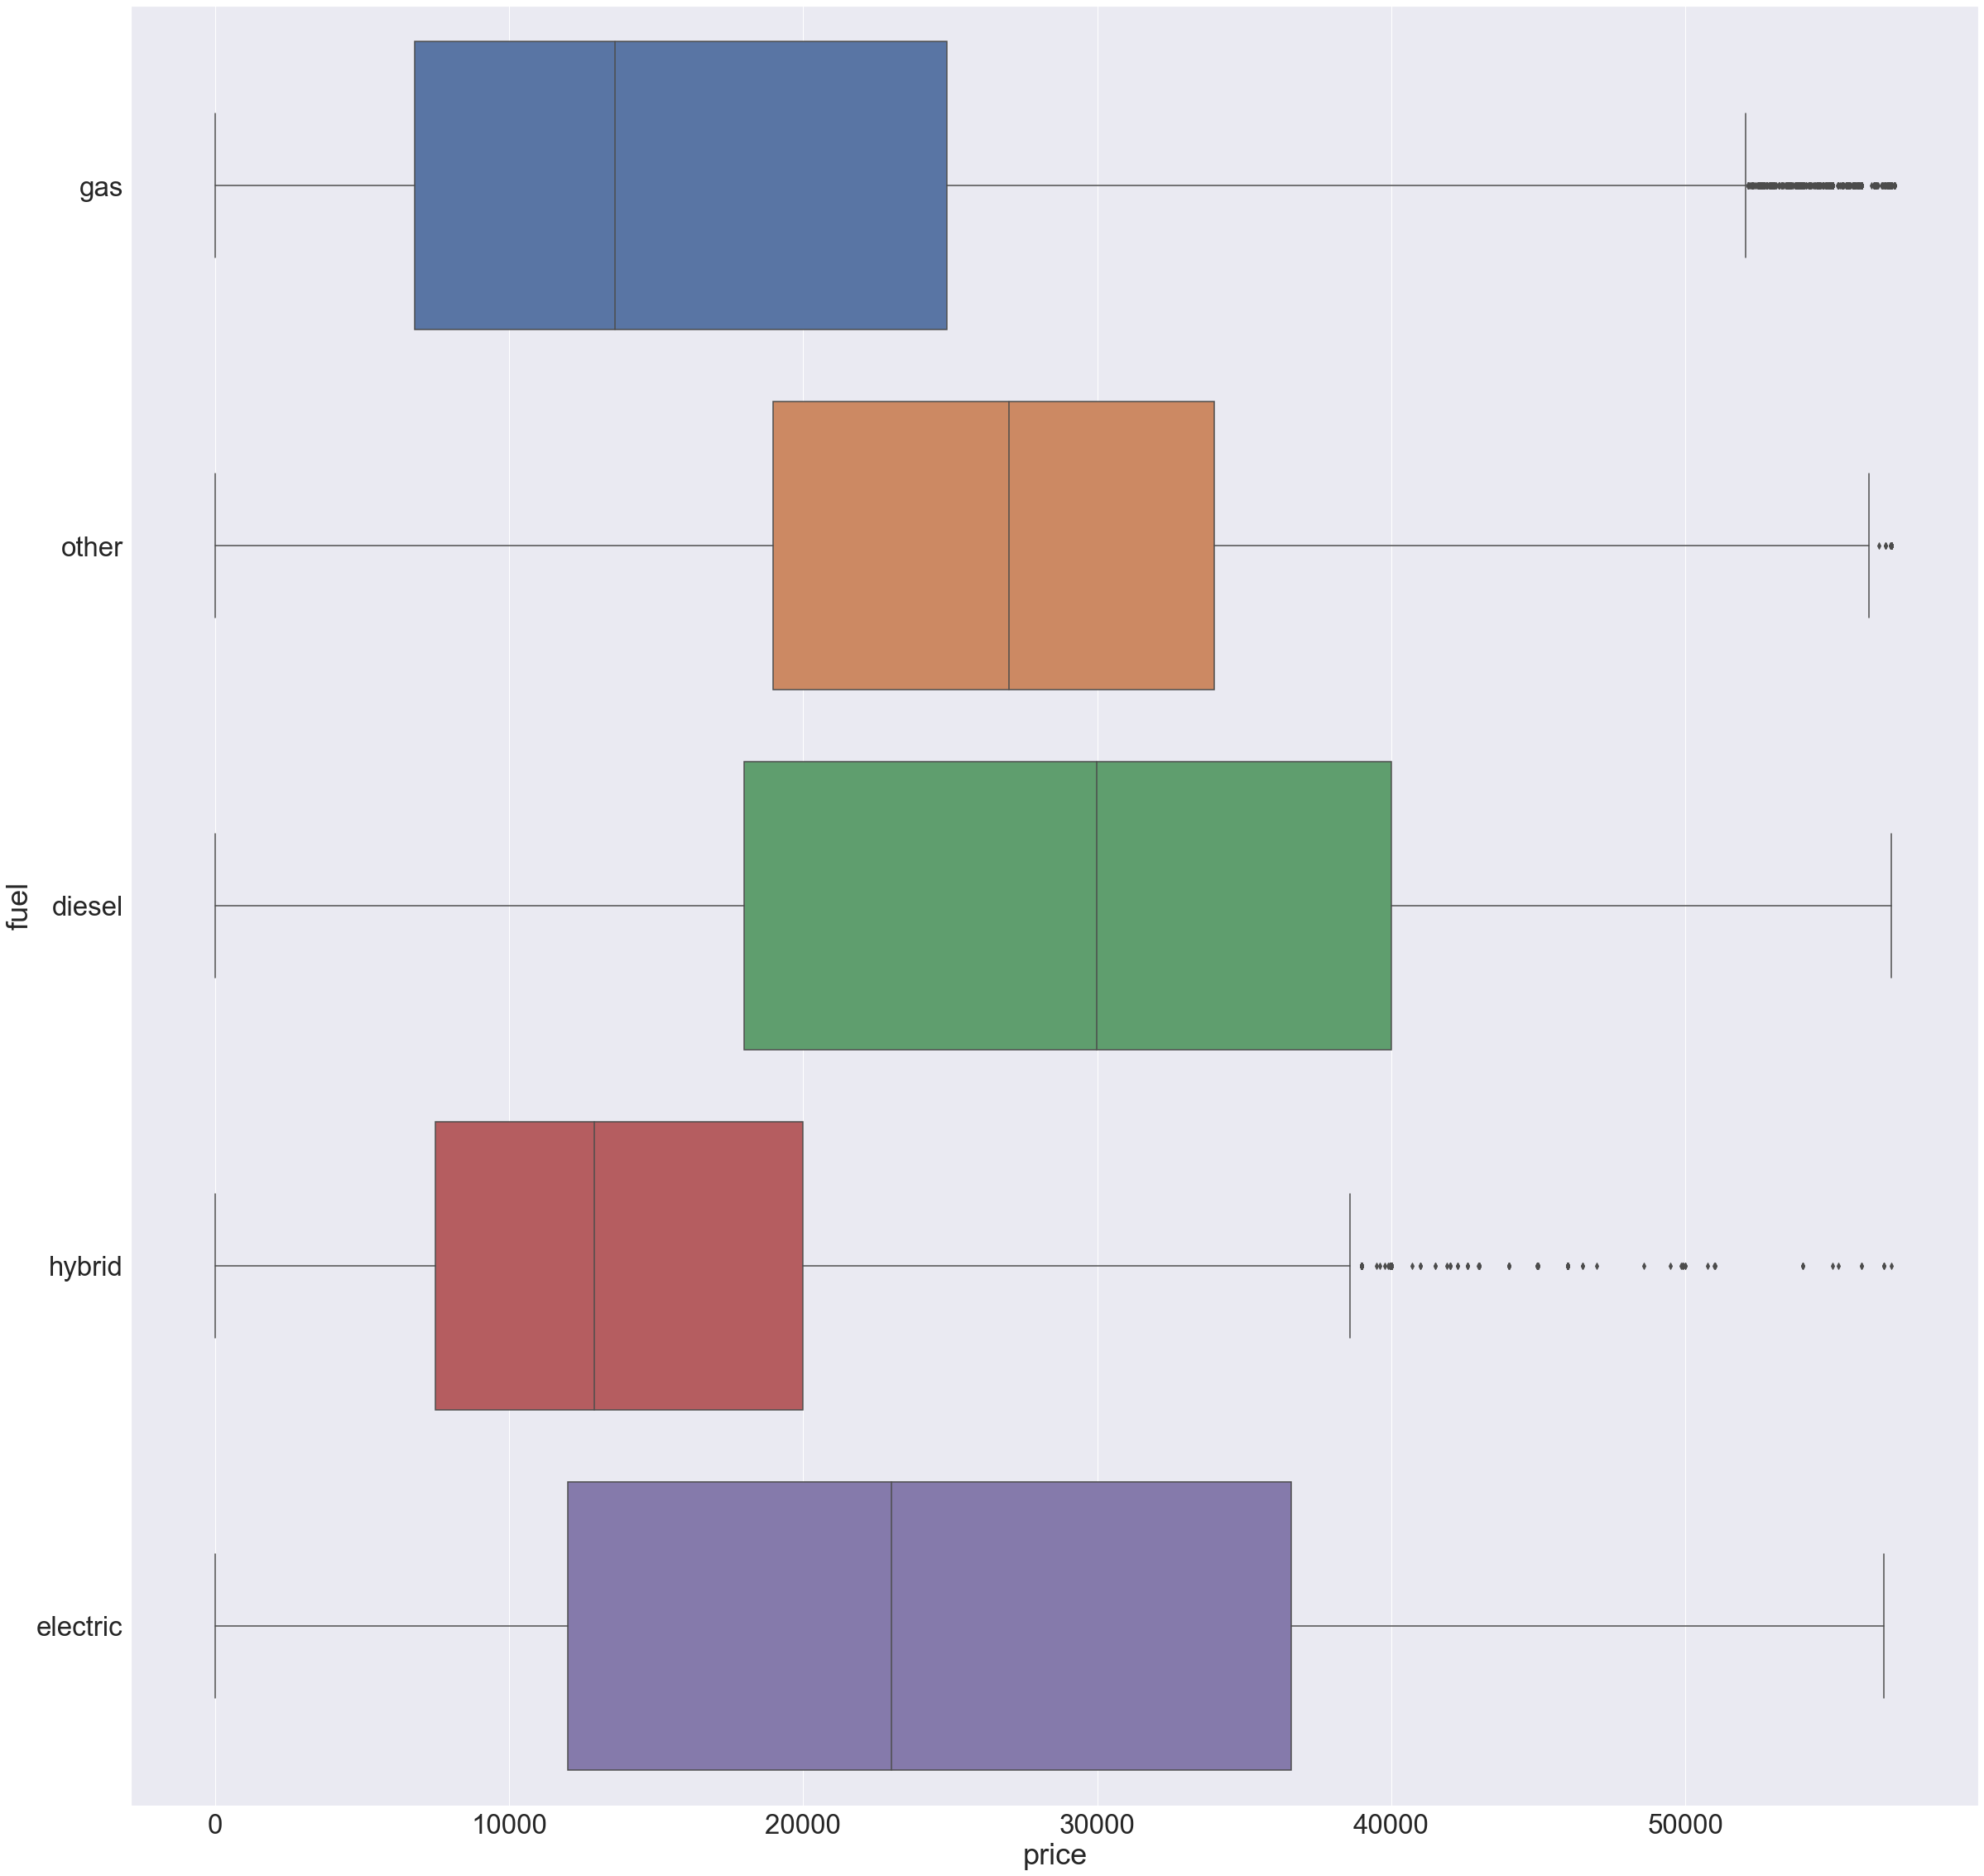

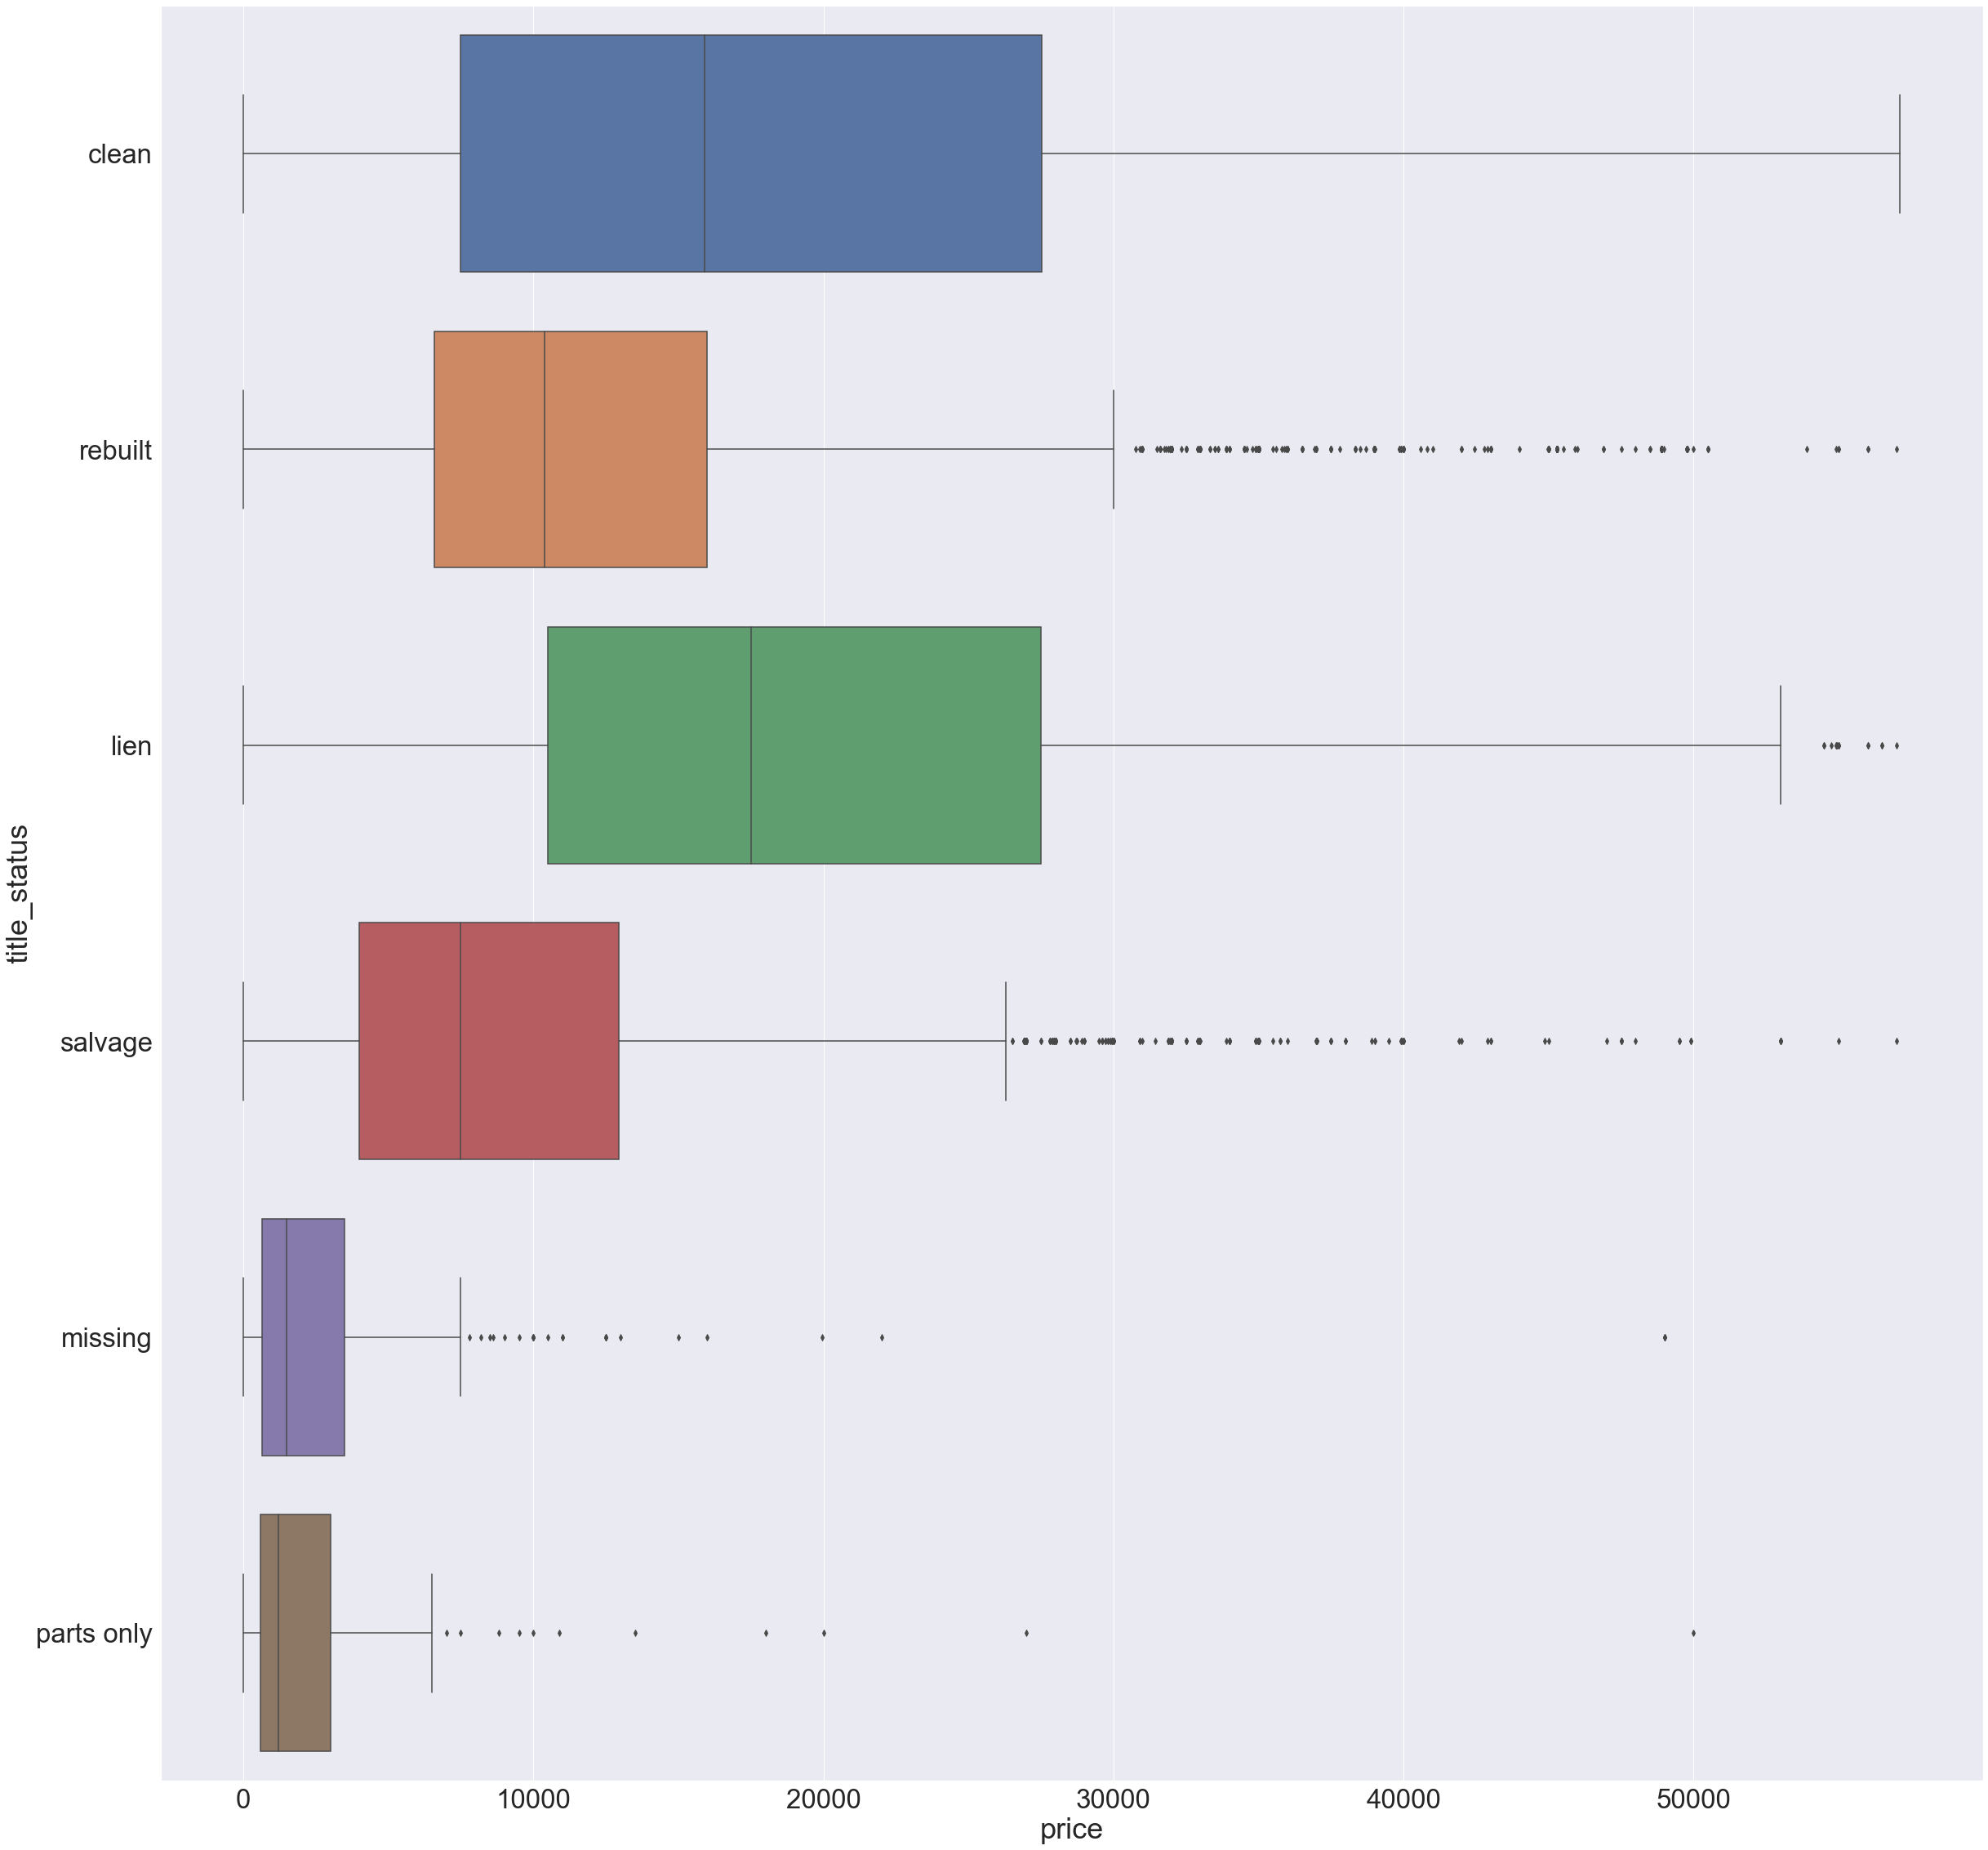

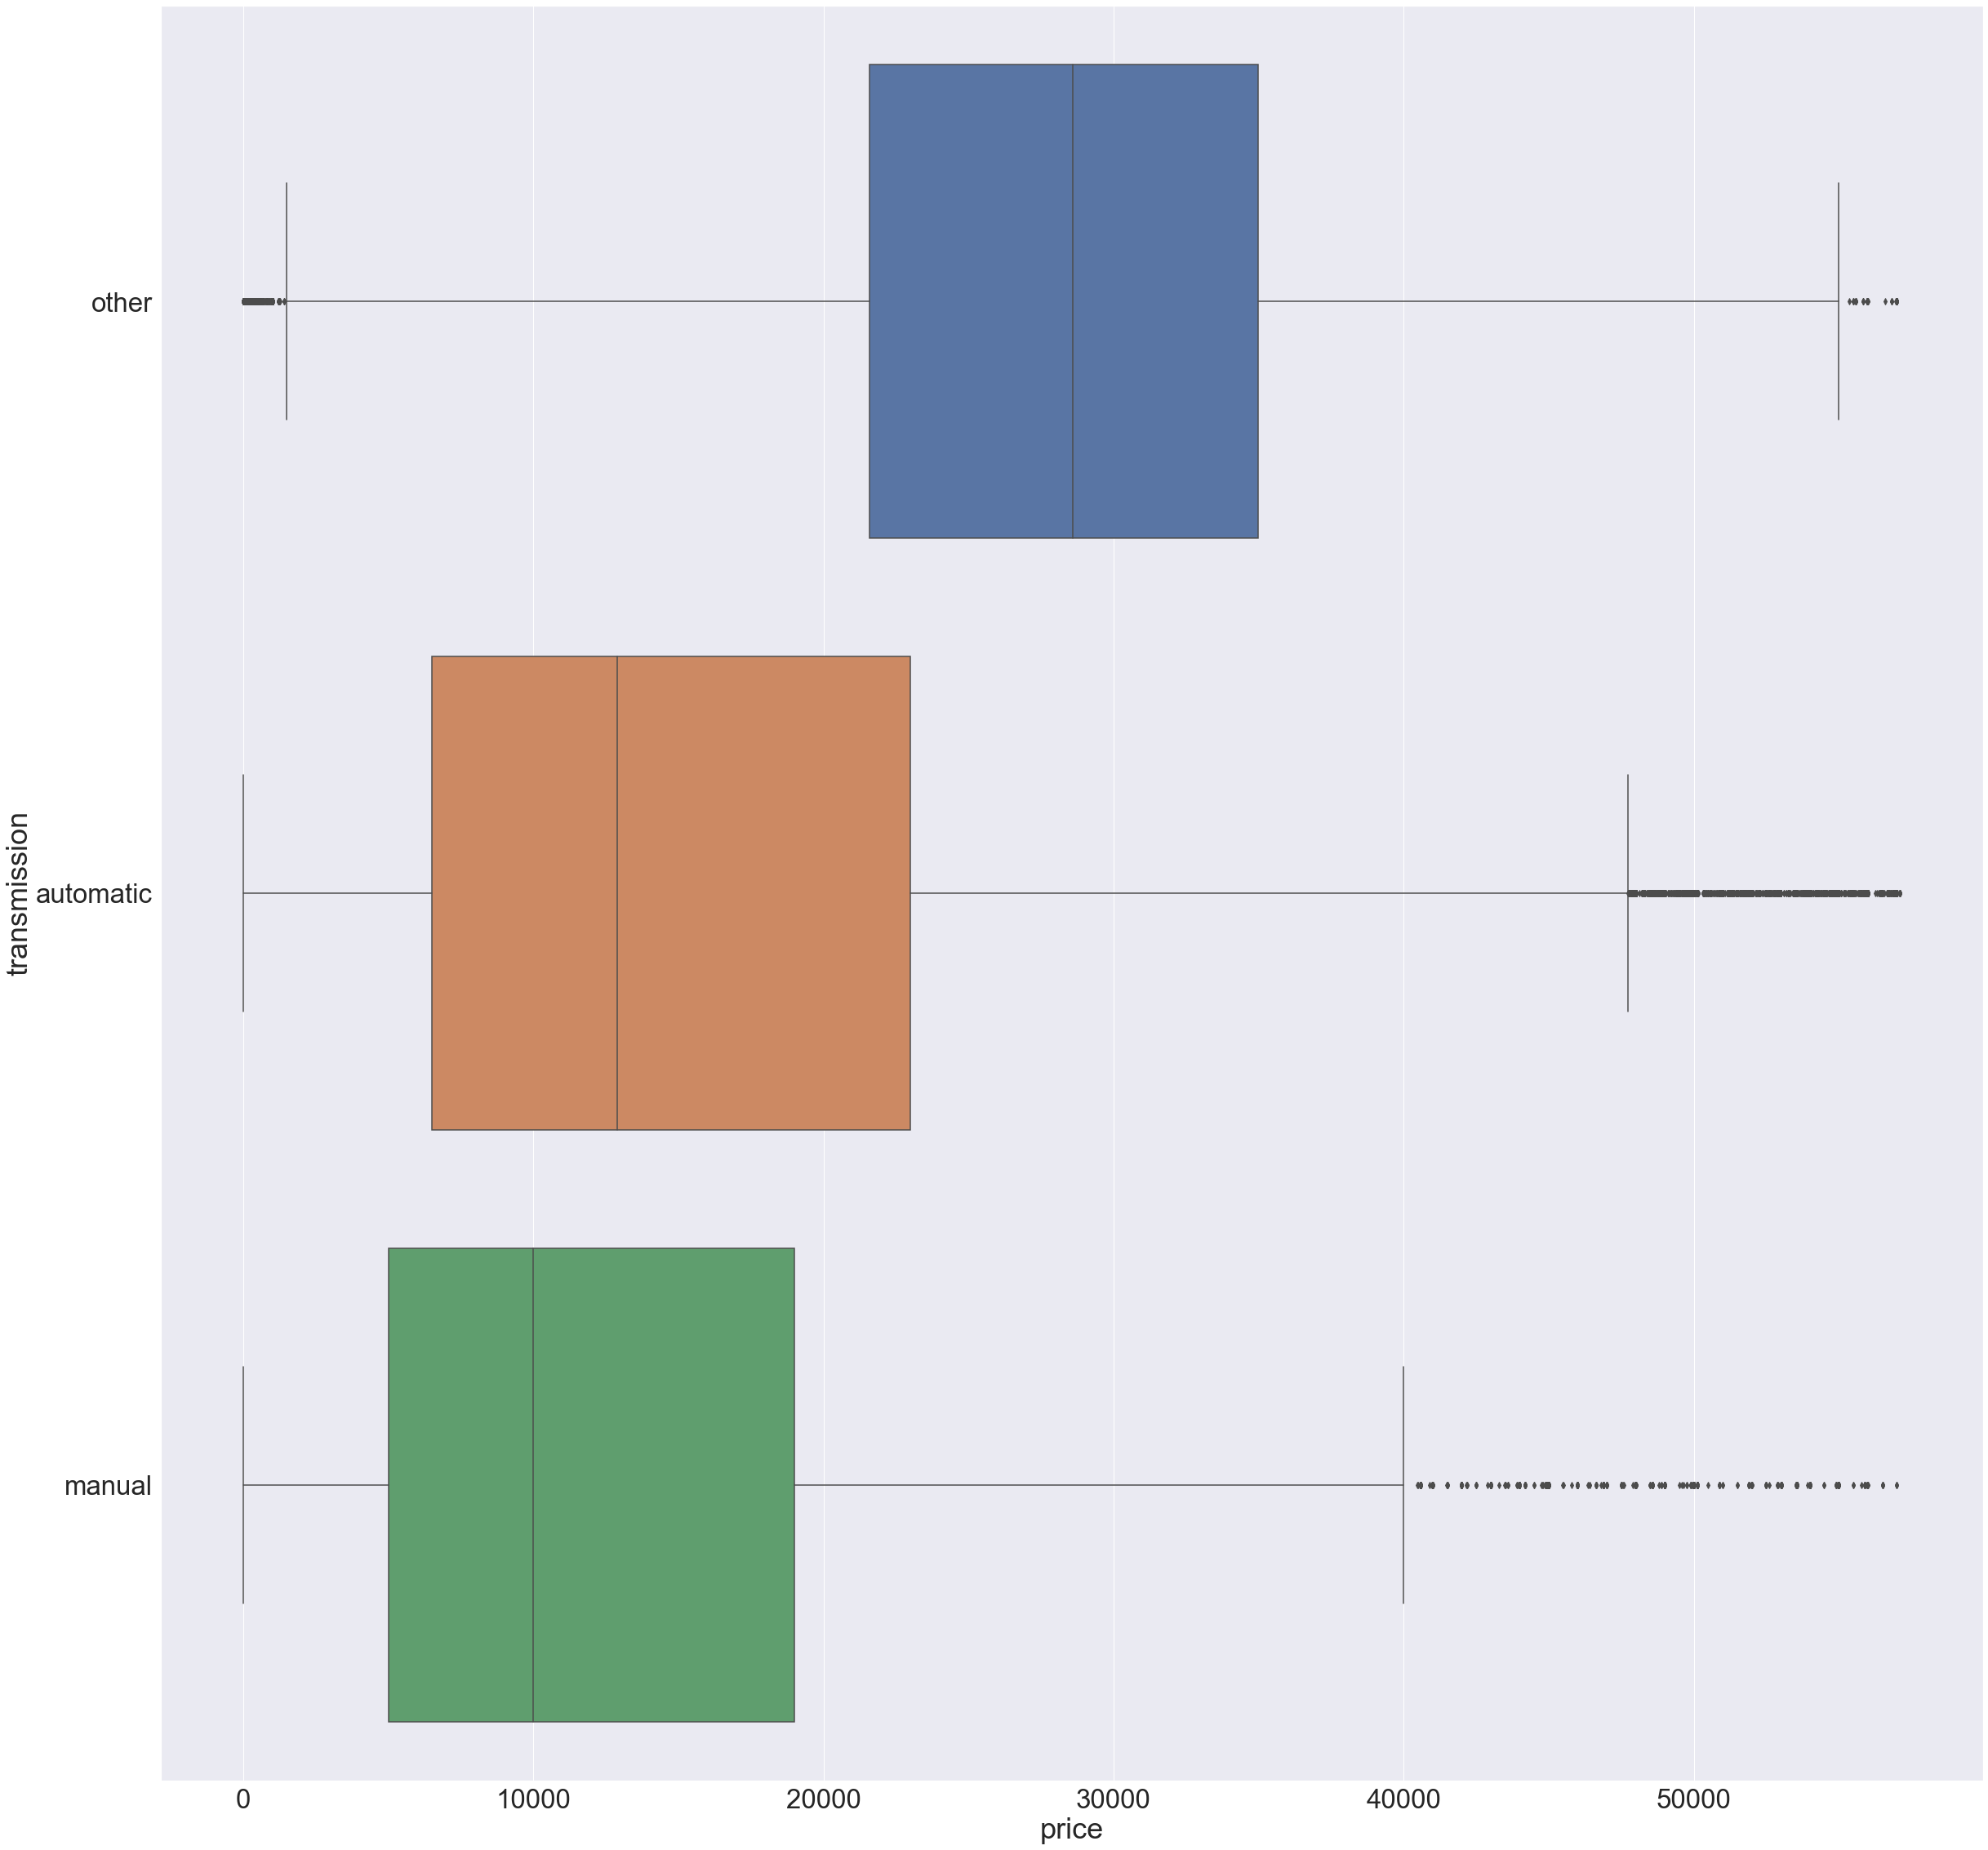

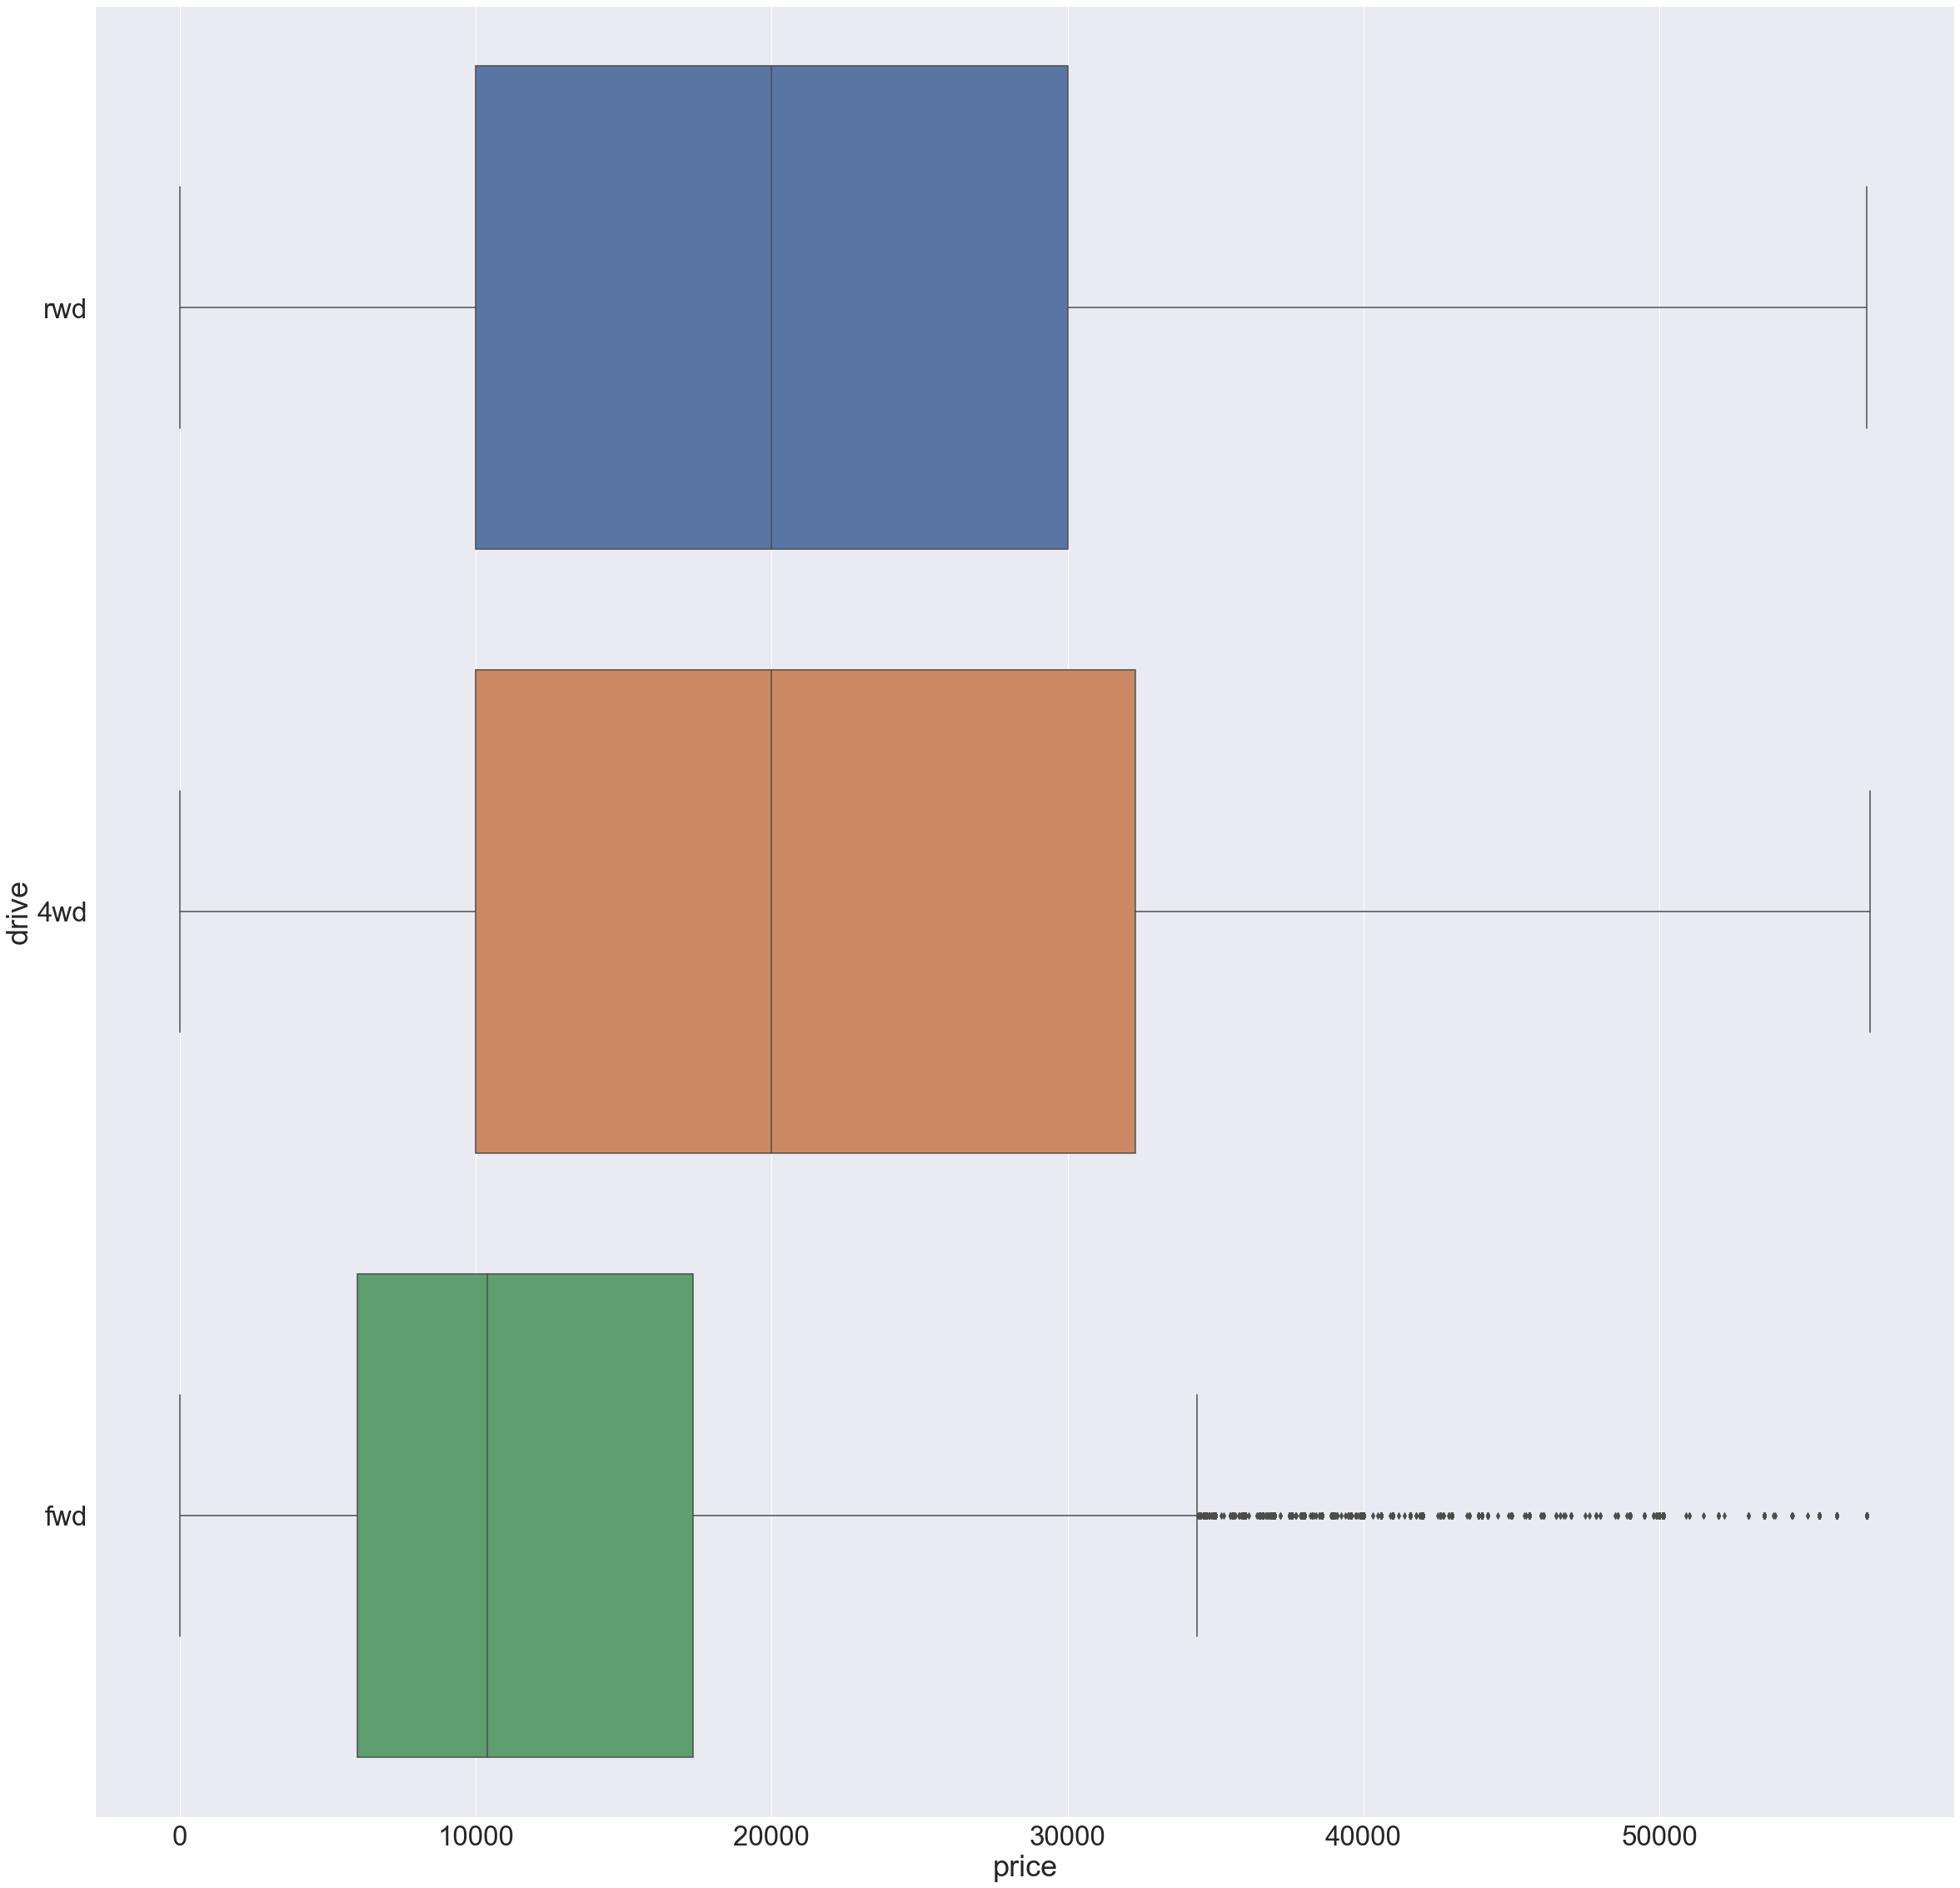

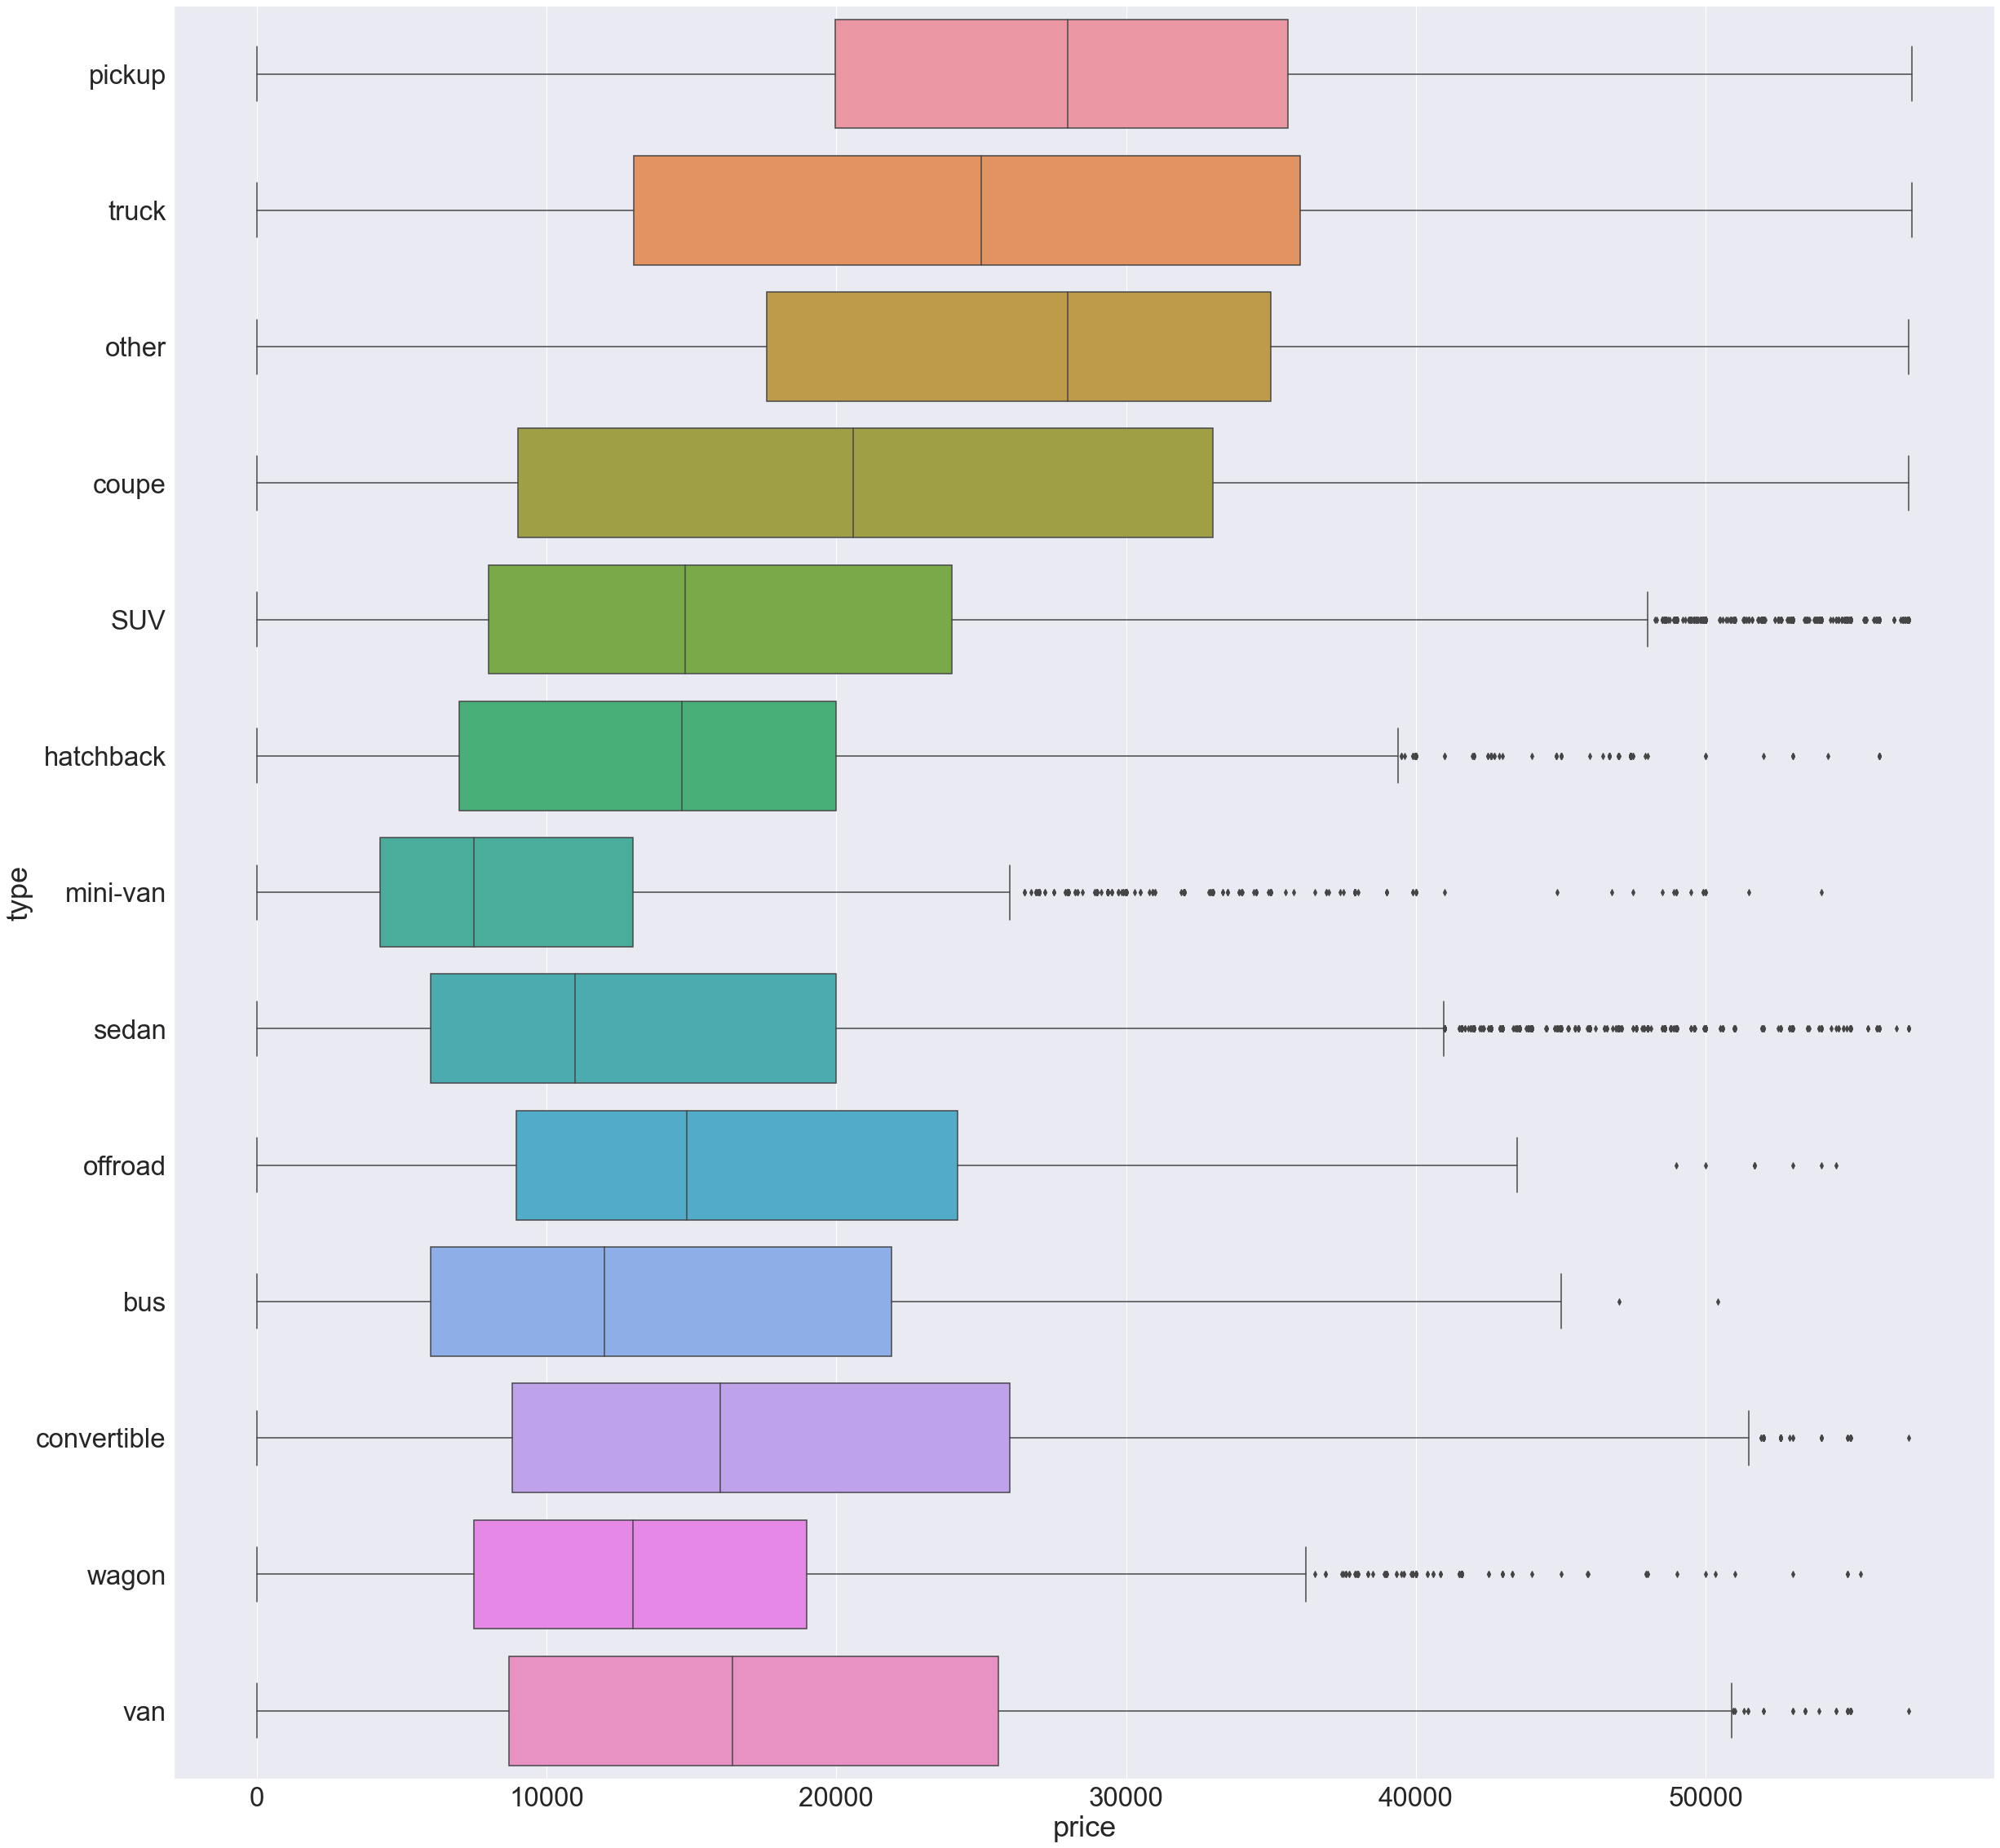

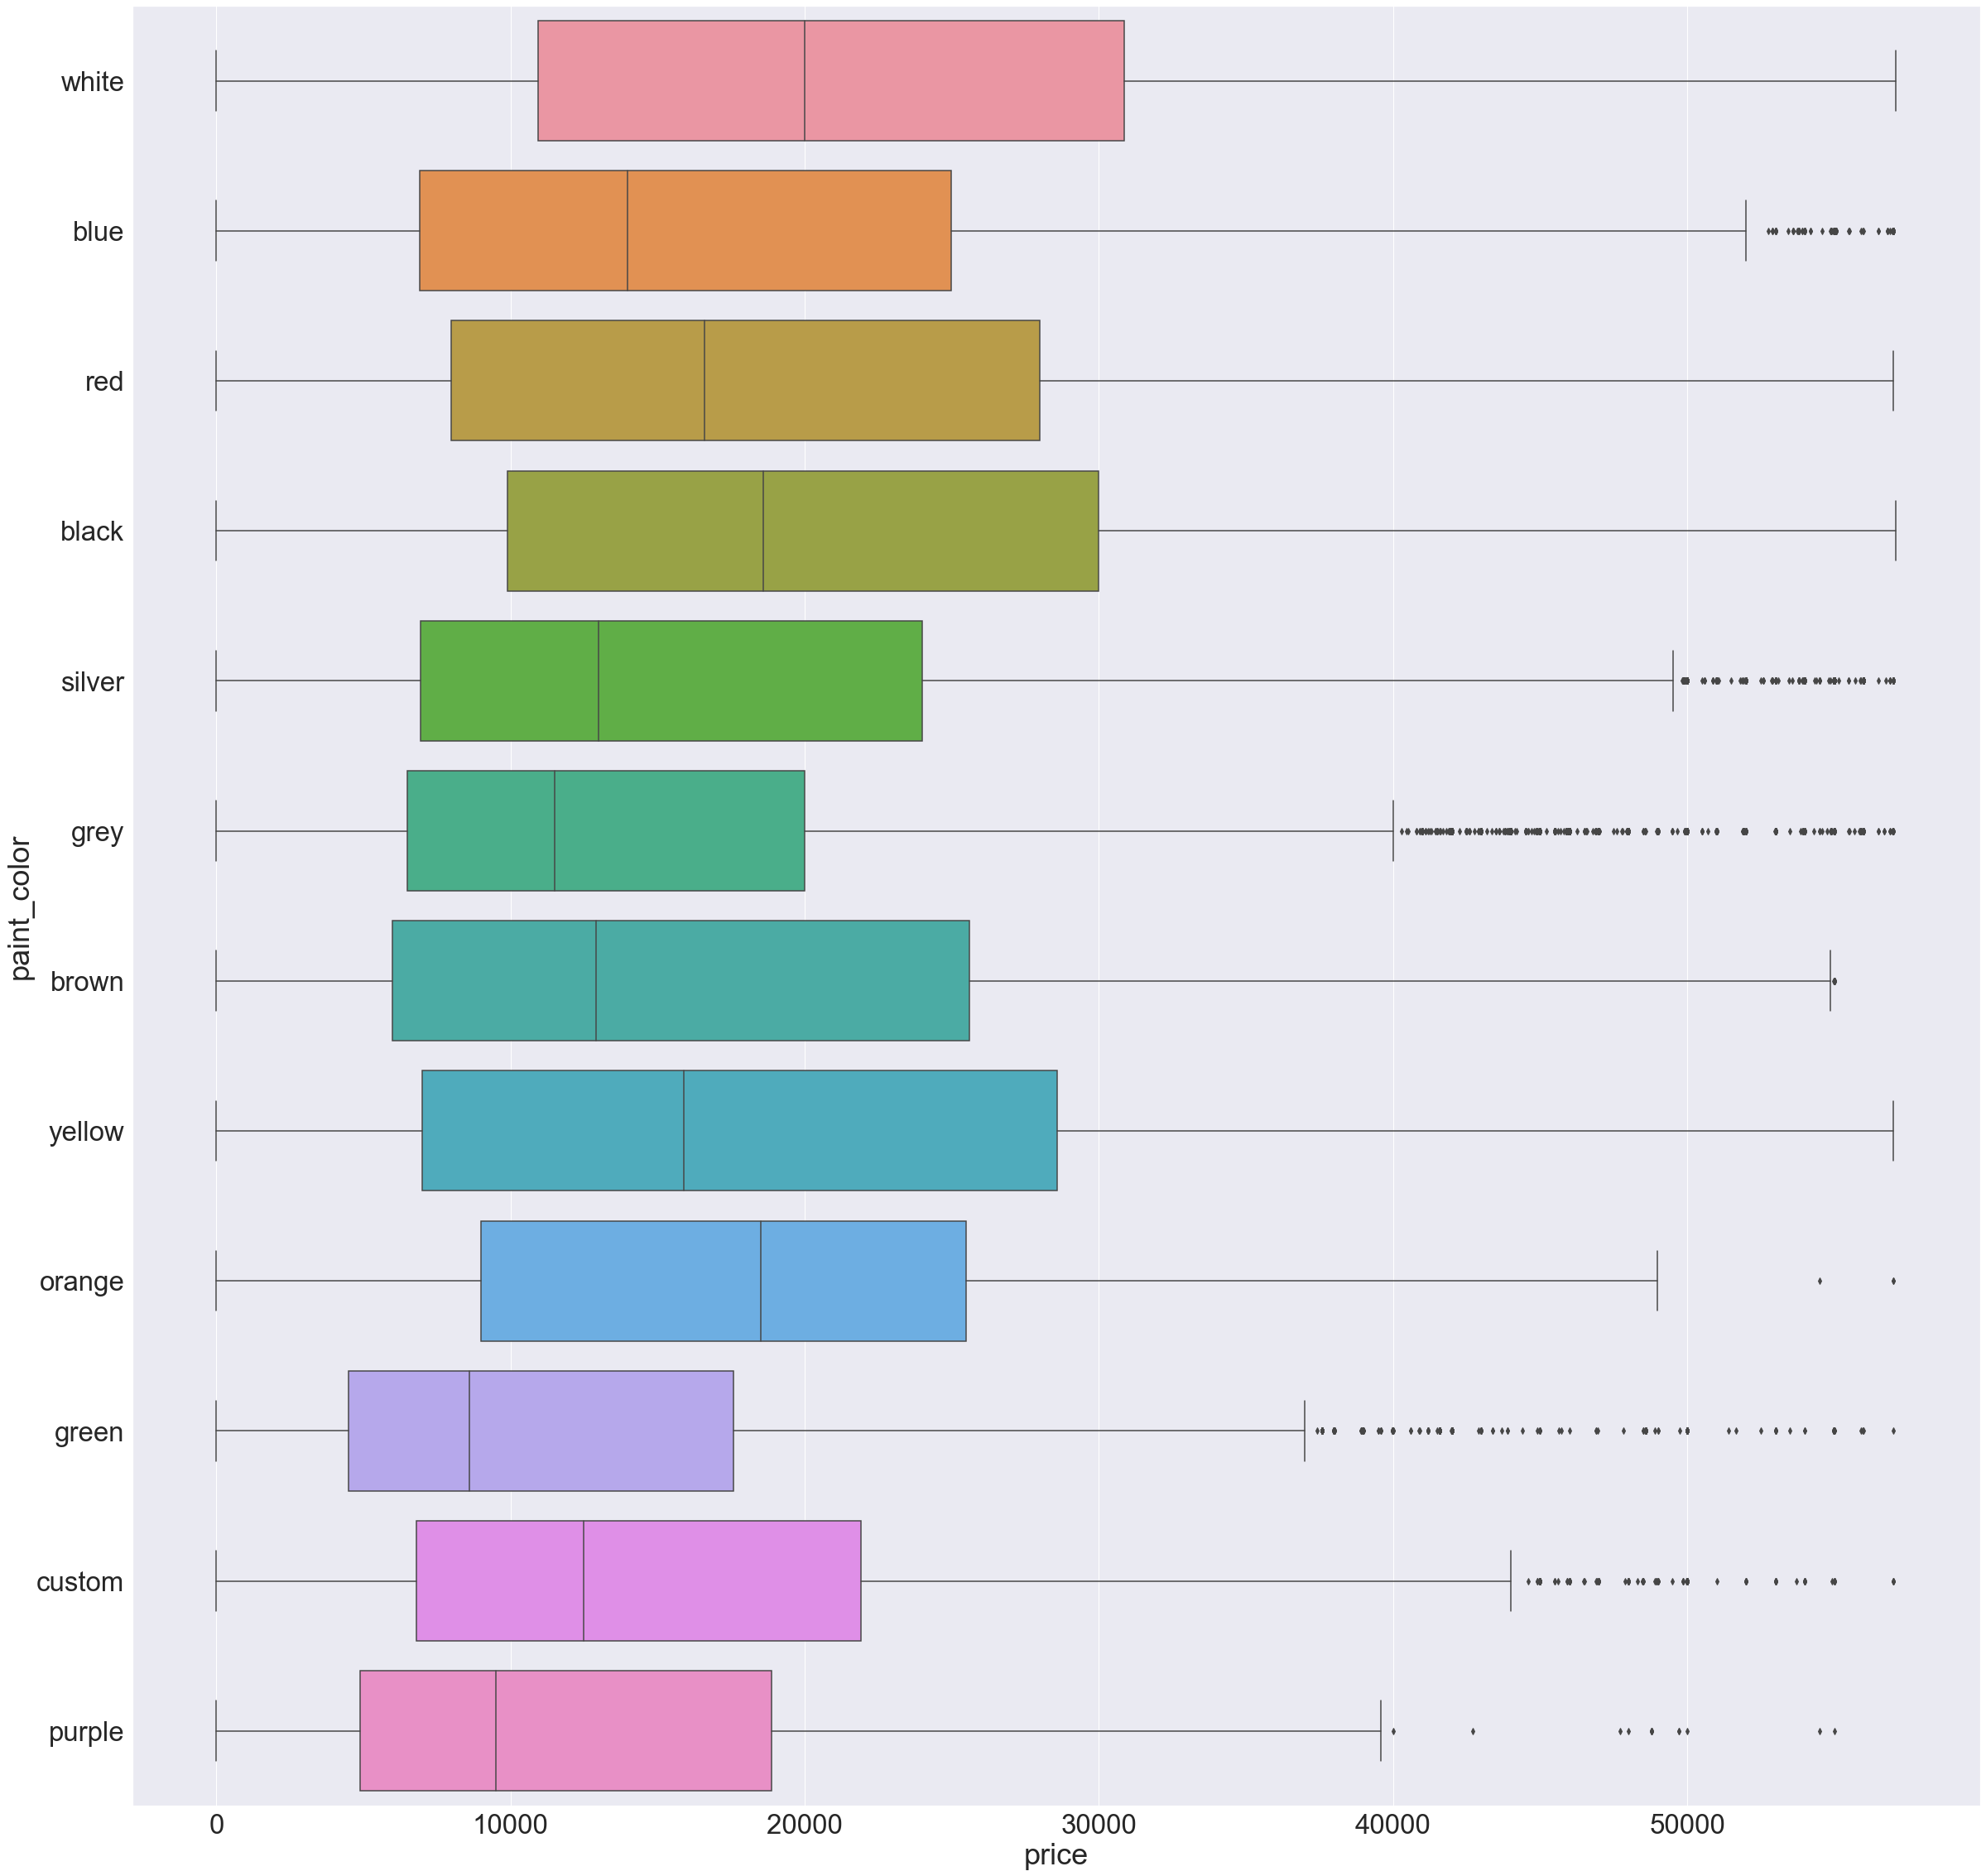

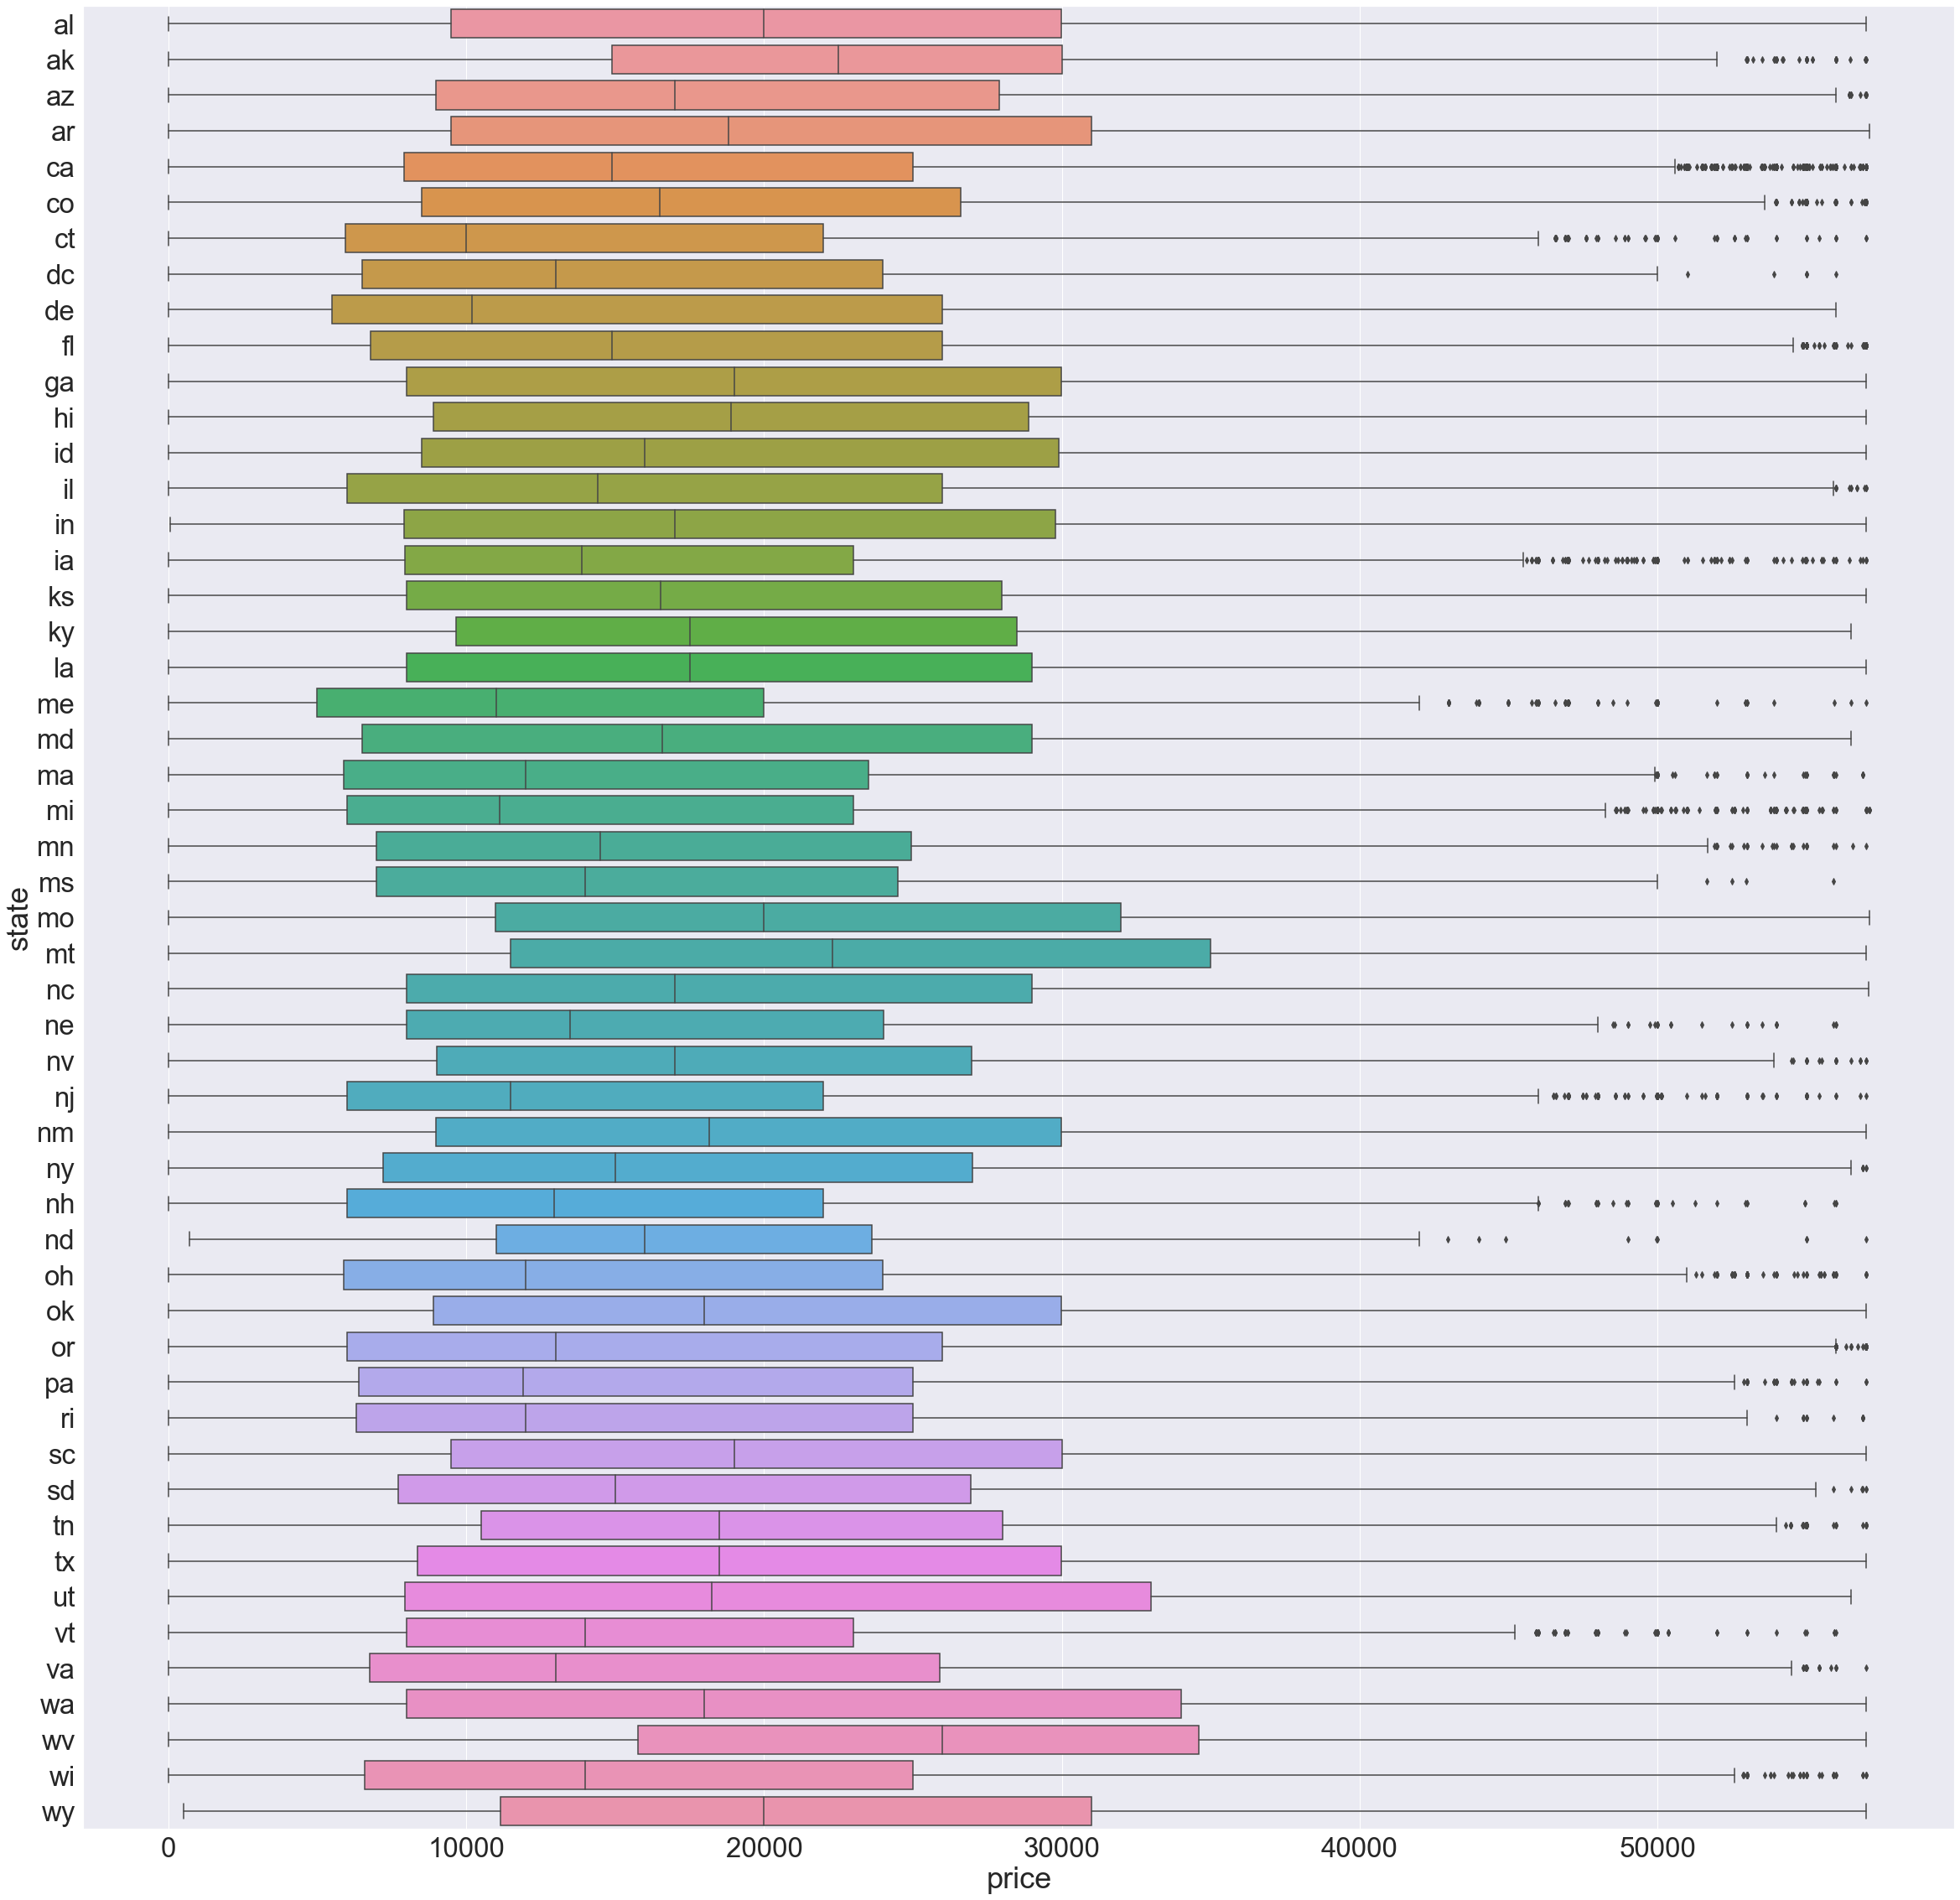

In [58]:
for col in prepped_cars.select_dtypes(include='object').columns:
    plt.figure(figsize = (40,40))
    sns.boxplot(data = prepped_cars, x = 'price', y = col)
    sns.set(font_scale = 3)

# Preprocessing Data Pipelines

In [59]:
X = prepped_cars.drop('price', axis = 1)
y = prepped_cars['price']
X, y

(        region  year manufacturer           model  condition    cylinders  \
 0       others     8          gmc          others       good  8 cylinders   
 1       others    12    chevrolet  silverado 1500       good  8 cylinders   
 2       others     2    chevrolet          others       good  8 cylinders   
 3       others     5       toyota          others       good  8 cylinders   
 4       others     9         ford          others  excellent  6 cylinders   
 ...        ...   ...          ...             ...        ...          ...   
 421339  others     3       nissan          others       good  6 cylinders   
 421340  others     2       others          others       good          NaN   
 421341  others     2       others          others       good          NaN   
 421342  others     4       others          others       good  6 cylinders   
 421343  others     3          bmw          others       good          NaN   
 
           fuel  odometer title_status transmission drive     

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modeling, Predicting, & Analyzing

## Model 1

### CV Grid Search, Target Encoding, Ridge Regression, & Standard Scaling

In [61]:
categorical_columns = ['region', 'manufacturer', 'model', 'condition',
                       'cylinders', 'fuel', 'title_status', 'transmission',
                       'drive', 'type', 'paint_color', 'state']
numerical_columns = ["price", "odometer"]

scaler = StandardScaler()

transformer = TransformedTargetRegressor(regressor = Ridge())

In [62]:
target_preprocessor = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categorical_columns, verbose = 3)),
        ('scaler', StandardScaler())
    ])
    
parameters1 = {'regressor__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] }

gridsearchcv1 = GridSearchCV(
    transformer,
    param_grid=parameters1,
    cv=5,
    scoring=('r2', 'neg_mean_absolute_error'),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)

model1 = make_pipeline(target_preprocessor, gridsearchcv1)
model1

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('column_transform',
                                  TargetEncoder(cols=['region', 'manufacturer',
                                                      'model', 'condition',
                                                      'cylinders', 'fuel',
                                                      'title_status',
                                                      'transmission', 'drive',
                                                      'type', 'paint_color',
                                                      'state'],
                                                verbose=3)),
                                 ('scaler', StandardScaler())])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(regressor=Ridge()),
                              n_jobs=-1,
                              param_grid={'regressor__alpha': [1e-06, 1e-05,
                                                               0.0001, 0.001,
                                                               0.01, 0.1, 1, 10,
                                                               100, 1000,
                                                               10000]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

In [63]:
results1 = model1.fit(X_train, y_train)

In [64]:
print(results1['gridsearchcv'].best_params_, results1['gridsearchcv'].best_score_, results1['gridsearchcv'].best_estimator_.regressor_.coef_)

{'regressor__alpha': 1000} -5696.095690291288 [  518.66978926 -4921.69287902   686.6400022   1415.66722933
   283.06555327  1502.75659383  1996.12443858 -3105.27025981
   919.24504019     6.11794841  1881.98938296  1769.18488891
   428.54072242   766.8066767 ]


In [65]:
train_pred = results1.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
test_pred = results1.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

In [66]:
print(f"R2: {r2_score(y_test, test_pred)*100:.4}%")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, test_pred):.6}")
print(f"Root Mean Square Training Error: ${np.sqrt(train_mse):.6}\nRoot Mean Square Testing Error: ${np.sqrt(test_mse):.6}")

R2: 62.39%
Mean Absolute Error: $5638.07
Root Mean Square Training Error: $7876.89
Root Mean Square Testing Error: $7801.09


Text(0, 0.5, 'Predicted Price')

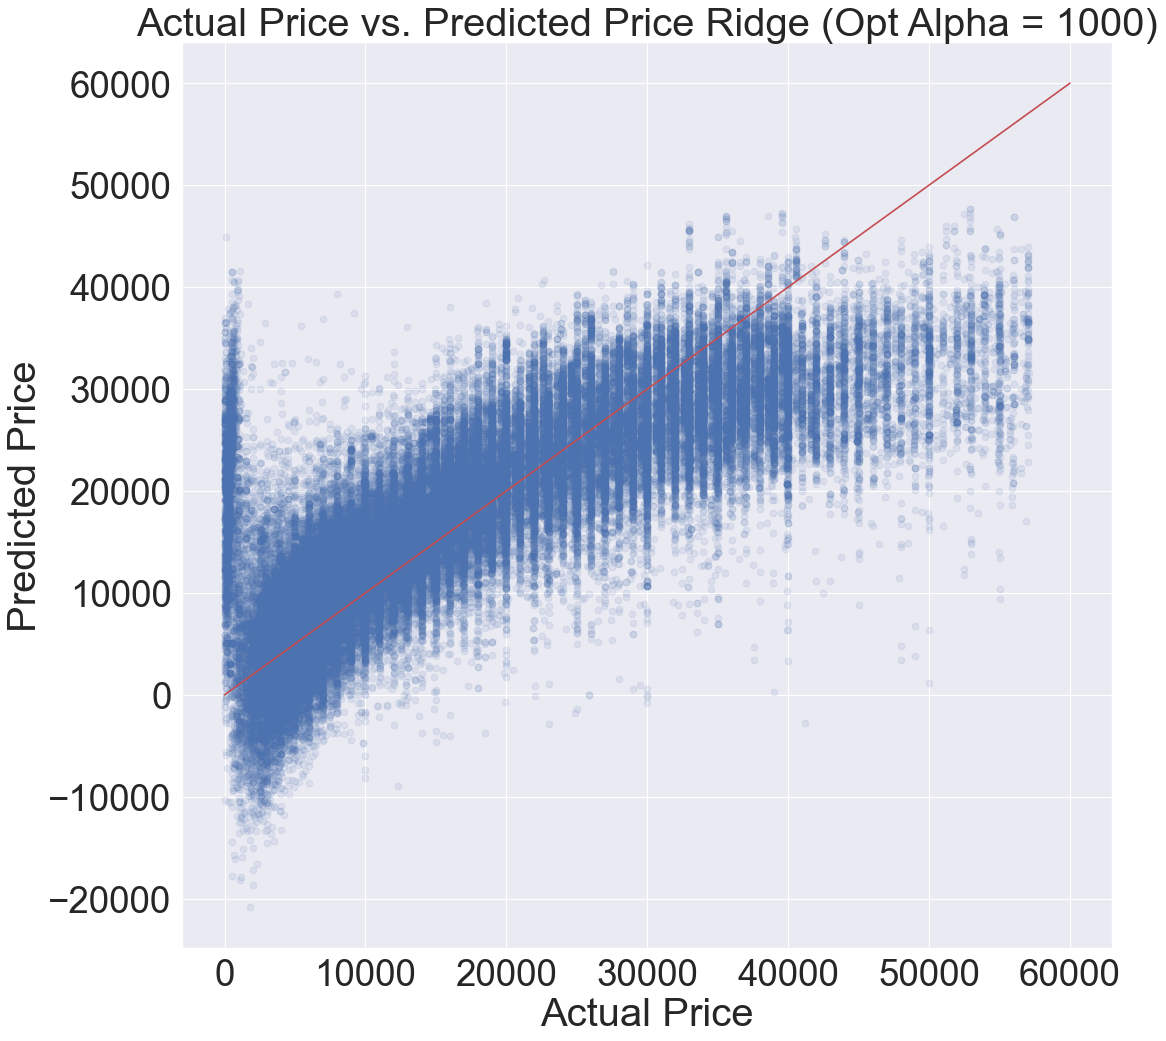

In [117]:
plt.figure(figsize = (15,15), dpi =80)
plt.scatter(x=y_test, y=test_pred, alpha=0.1)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Ridge (Opt Alpha = 1000)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [68]:
feature_names = X.columns
coefs = pd.DataFrame(results1['gridsearchcv'].best_estimator_.regressor_.coef_,columns=["Coefficients"],index = feature_names)
coefs.sort_values('Coefficients')

Coefficients
year          -4921.692879
odometer      -3105.270260
transmission      6.117948
condition       283.065553
paint_color     428.540722
region          518.669789
manufacturer    686.640002
state           766.806677
title_status    919.245040
model          1415.667229
cylinders      1502.756594
type           1769.184889
drive          1881.989383
fuel           1996.124439

Text(0.5, 1.0, 'Model 1 Coefs')

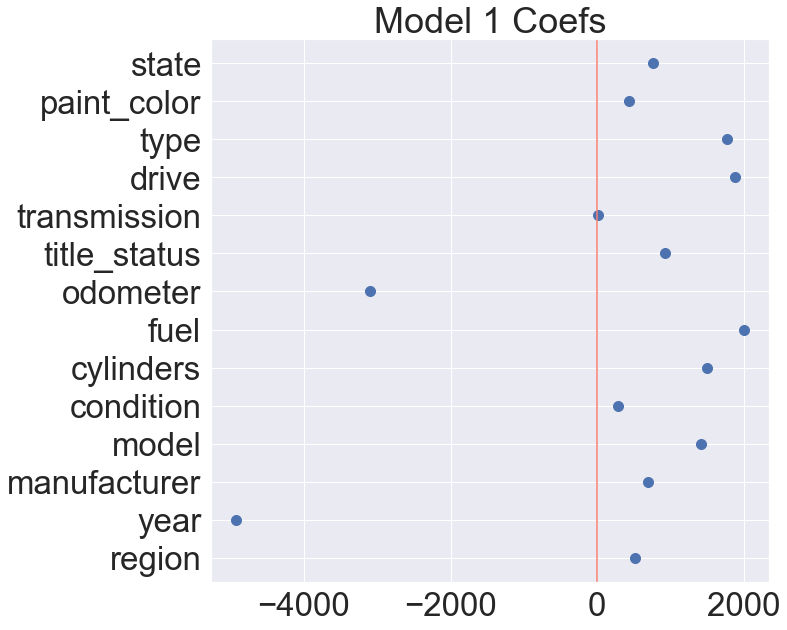

In [116]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(coefs, coefs.index, 'o', markersize = 10)
ax.axvline(color = 'salmon')
ax.set_title('Model 1 Coefs')

In [70]:
r = permutation_importance(results1, X_test, y_test,
                          n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{coefs.index[i]:}"
               f"   {r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

year   2565.560 +/- 12.345
odometer   1198.709 +/- 9.292
drive   409.022 +/- 5.865
fuel   376.377 +/- 6.247
type   368.684 +/- 5.561
cylinders   244.056 +/- 4.572
model   238.369 +/- 5.004
title_status   93.191 +/- 2.930
state   62.022 +/- 2.362
manufacturer   40.381 +/- 2.402
region   18.656 +/- 1.307
paint_color   13.745 +/- 1.257
condition   8.213 +/- 1.102


## Model 2

### CV Grid Search, Target Encoding, Logarithmic Ridge Regression, & Standard Scaling

In [73]:
target_preprocessor = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categorical_columns, verbose = 3)),
        ('scaler', StandardScaler())
    ])

log_transformer = TransformedTargetRegressor(regressor = Ridge(), func=np.log10, inverse_func=sp.special.exp10)

parameters2 = {'regressor__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100] }

gridsearchcv2 = GridSearchCV(
    log_transformer,
    param_grid=parameters2,
    cv=5,
    scoring=('r2', 'neg_mean_absolute_error'),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)

model2 = make_pipeline(target_preprocessor, gridsearchcv2)
model2

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('column_transform',
                                  TargetEncoder(cols=['region', 'manufacturer',
                                                      'model', 'condition',
                                                      'cylinders', 'fuel',
                                                      'title_status',
                                                      'transmission', 'drive',
                                                      'type', 'paint_color',
                                                      'state'],
                                                verbose=3)),
                                 ('scaler', StandardScaler())])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(func=<ufunc 'log10'>,
                                                                   inverse_func=<ufunc 'exp10'>,
                                                                   regressor=Ridge()),
                              n_jobs=-1,
                              param_grid={'regressor__alpha': [1e-06, 1e-05,
                                                               0.0001, 0.001,
                                                               0.01, 0.1, 1, 10,
                                                               100]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

In [74]:
results2 = model2.fit(X_train, y_train)

In [75]:
print(results2['gridsearchcv'].best_params_, results2['gridsearchcv'].best_score_, results2['gridsearchcv'].best_estimator_.regressor_.coef_)

{'regressor__alpha': 1e-06} -6115.451265076612 [ 0.02290512 -0.15433348  0.01139603  0.0447838   0.03066901  0.04282265
  0.04641085 -0.06551708  0.03358001 -0.00299458  0.03410551  0.05998173
  0.02930577  0.02685269]


In [76]:
train_pred2 = results2.predict(X_train)
train_mse2 = mean_squared_error(y_train, train_pred2)
test_pred2 = results2.predict(X_test)
test_mse2 = mean_squared_error(y_test, test_pred2)

In [77]:
print(f"R2: {r2_score(y_test, test_pred2)*100:.4}%")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, test_pred2):.6}")
print(f"Root Mean Square Training Error: ${np.sqrt(train_mse2):.6}\nRoot Mean Square Testing Error: ${np.sqrt(test_mse2):.6}")

R2: 52.96%
Mean Absolute Error: $6066.64
Root Mean Square Training Error: $8785.36
Root Mean Square Testing Error: $8724.93


Text(0, 0.5, 'Predicted Price')

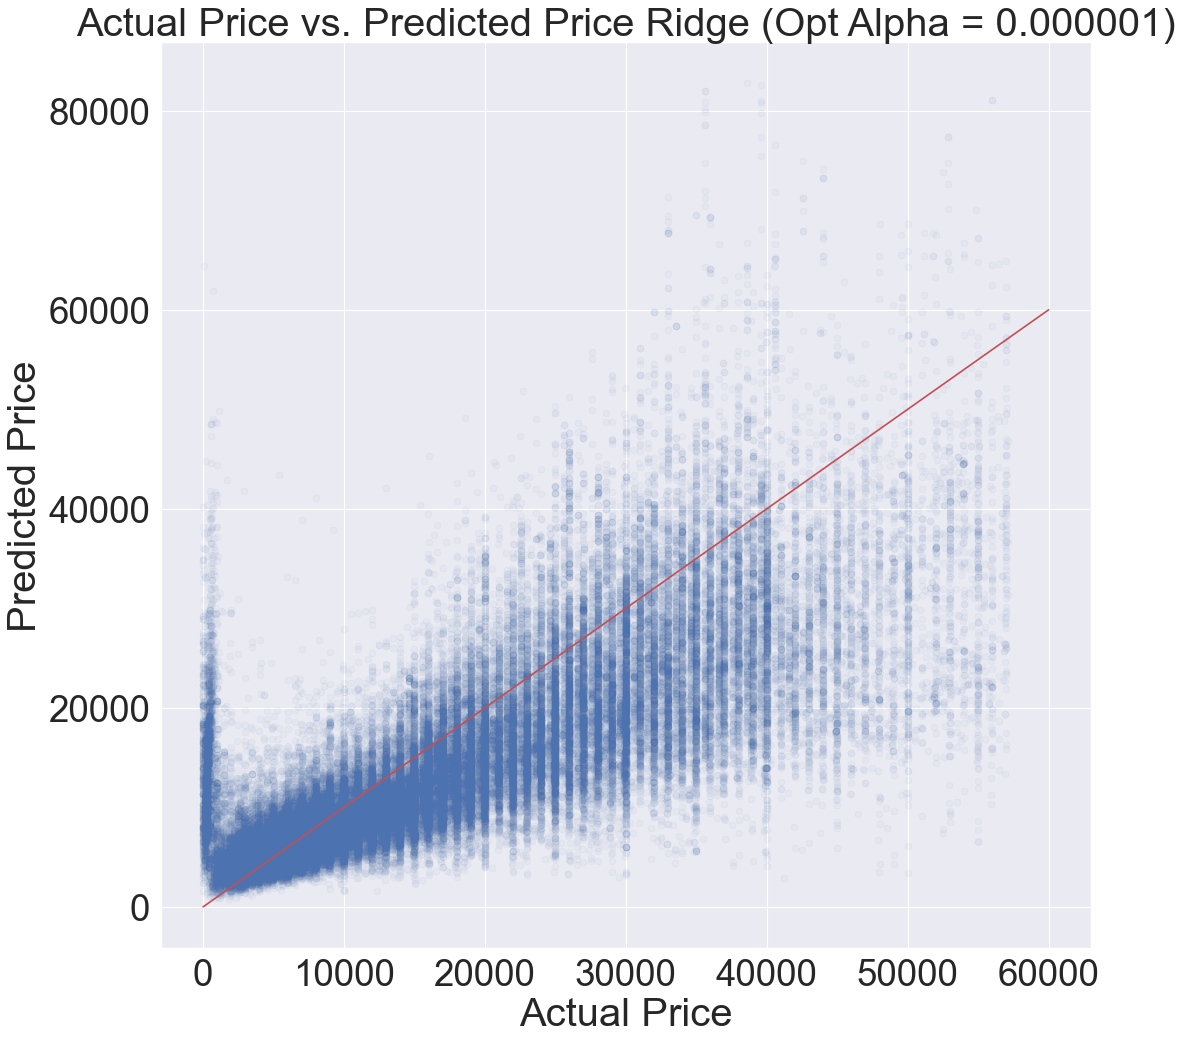

In [115]:
plt.figure(figsize = (15,15), dpi =80)
plt.scatter(x=y_test, y=test_pred2, alpha=0.04)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Ridge (Opt Alpha = 0.000001)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [79]:
feature_names = X.columns
coefs2 = pd.DataFrame(results2['gridsearchcv'].best_estimator_.regressor_.coef_,columns=["Coefficients"],index = feature_names)
coefs2.sort_values('Coefficients')

Coefficients
year             -0.154333
odometer         -0.065517
transmission     -0.002995
manufacturer      0.011396
region            0.022905
state             0.026853
paint_color       0.029306
condition         0.030669
title_status      0.033580
drive             0.034106
cylinders         0.042823
model             0.044784
fuel              0.046411
type              0.059982

Text(0.5, 1.0, 'Model 2 Coefs')

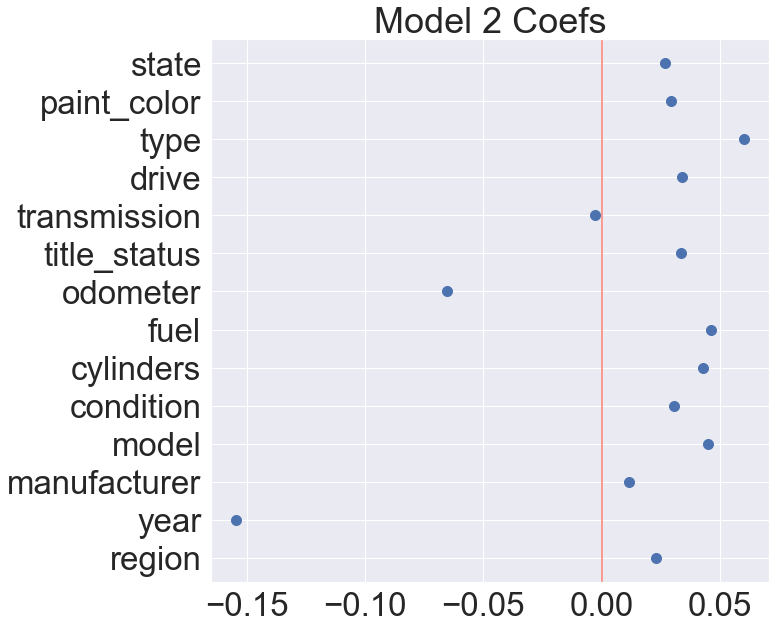

In [114]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(coefs2, coefs2.index, 'o', markersize = 10)
ax.axvline(color = 'salmon')
ax.set_title('Model 2 Coefs')

In [81]:
r = permutation_importance(results2, X_test, y_test,
                          n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{coefs2.index[i]:}"
               f"   {r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

year   2431.489 +/- 10.389
odometer   746.893 +/- 4.718
type   490.505 +/- 7.577
drive   242.928 +/- 3.426
fuel   239.821 +/- 6.496
model   228.746 +/- 4.686
cylinders   214.804 +/- 5.057
title_status   80.465 +/- 2.997
state   67.744 +/- 3.601
paint_color   63.709 +/- 3.442
condition   49.236 +/- 3.490
region   38.880 +/- 2.720
manufacturer   20.802 +/- 1.641
transmission   7.855 +/- 0.376


## Model 3

###  GridSearchCV, Target Encoding, Sequential Selection with Lasso, Ridge Regression, & Standard Scaling

In [82]:
target_preprocessor = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categorical_columns, verbose = 3)),
        ('scaler', StandardScaler())
    ])

log_transformer = TransformedTargetRegressor(regressor = Ridge(), transformer = StandardScaler())

seq_selector = Pipeline(
    [
        ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select = 5)
    )
    ])

parameters3 = {'regressor__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

gridsearchcv3 = GridSearchCV(
    log_transformer,
    param_grid=parameters3,
    cv=5,
    scoring=('r2', 'neg_mean_absolute_error'),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1
)

model3 = make_pipeline(target_preprocessor, seq_selector, gridsearchcv3)
model3

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('column_transform',
                                  TargetEncoder(cols=['region', 'manufacturer',
                                                      'model', 'condition',
                                                      'cylinders', 'fuel',
                                                      'title_status',
                                                      'transmission', 'drive',
                                                      'type', 'paint_color',
                                                      'state'],
                                                verbose=3)),
                                 ('scaler', StandardScaler())])),
                ('pipeline-2',
                 Pipeline(steps=[('selector',
                                  SequentialFeatureSelector(estimator=Lasso(),
                                                            n_features_to_select=5))])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=TransformedTargetRegressor(regressor=Ridge(),
                                                                   transformer=StandardScaler()),
                              n_jobs=-1,
                              param_grid={'regressor__alpha': [1e-06, 1e-05,
                                                               0.0001, 0.001,
                                                               0.01, 0.1, 1, 10,
                                                               100, 1000,
                                                               10000]},
                              refit='neg_mean_absolute_error',
                              return_train_score=True,
                              scoring=('r2', 'neg_mean_absolute_error')))])

In [83]:
results3 = model3.fit(X_train, y_train)

In [84]:
print(results3['gridsearchcv'].best_params_, results3['gridsearchcv'].best_score_, results3['gridsearchcv'].best_estimator_.regressor_.coef_)

{'regressor__alpha': 1000} -6138.760460267268 [-0.39531758  0.19841835  0.18145012 -0.24165421  0.23710248]


In [85]:
train_pred3 = results3.predict(X_train)
train_mse3 = mean_squared_error(y_train, train_pred3)
test_pred3 = results3.predict(X_test)
test_mse3 = mean_squared_error(y_test, test_pred3)

In [86]:
print(f"R2: {r2_score(y_test, test_pred3)*100:.4}%")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, test_pred3):.6}")
print(f"Root Mean Square Training Error: ${np.sqrt(train_mse3):.6}\nRoot Mean Square Testing Error: ${np.sqrt(test_mse3):.6}")

R2: 57.18%
Mean Absolute Error: $6071.51
Root Mean Square Training Error: $8410.42
Root Mean Square Testing Error: $8324.4


Text(0, 0.5, 'Predicted Price')

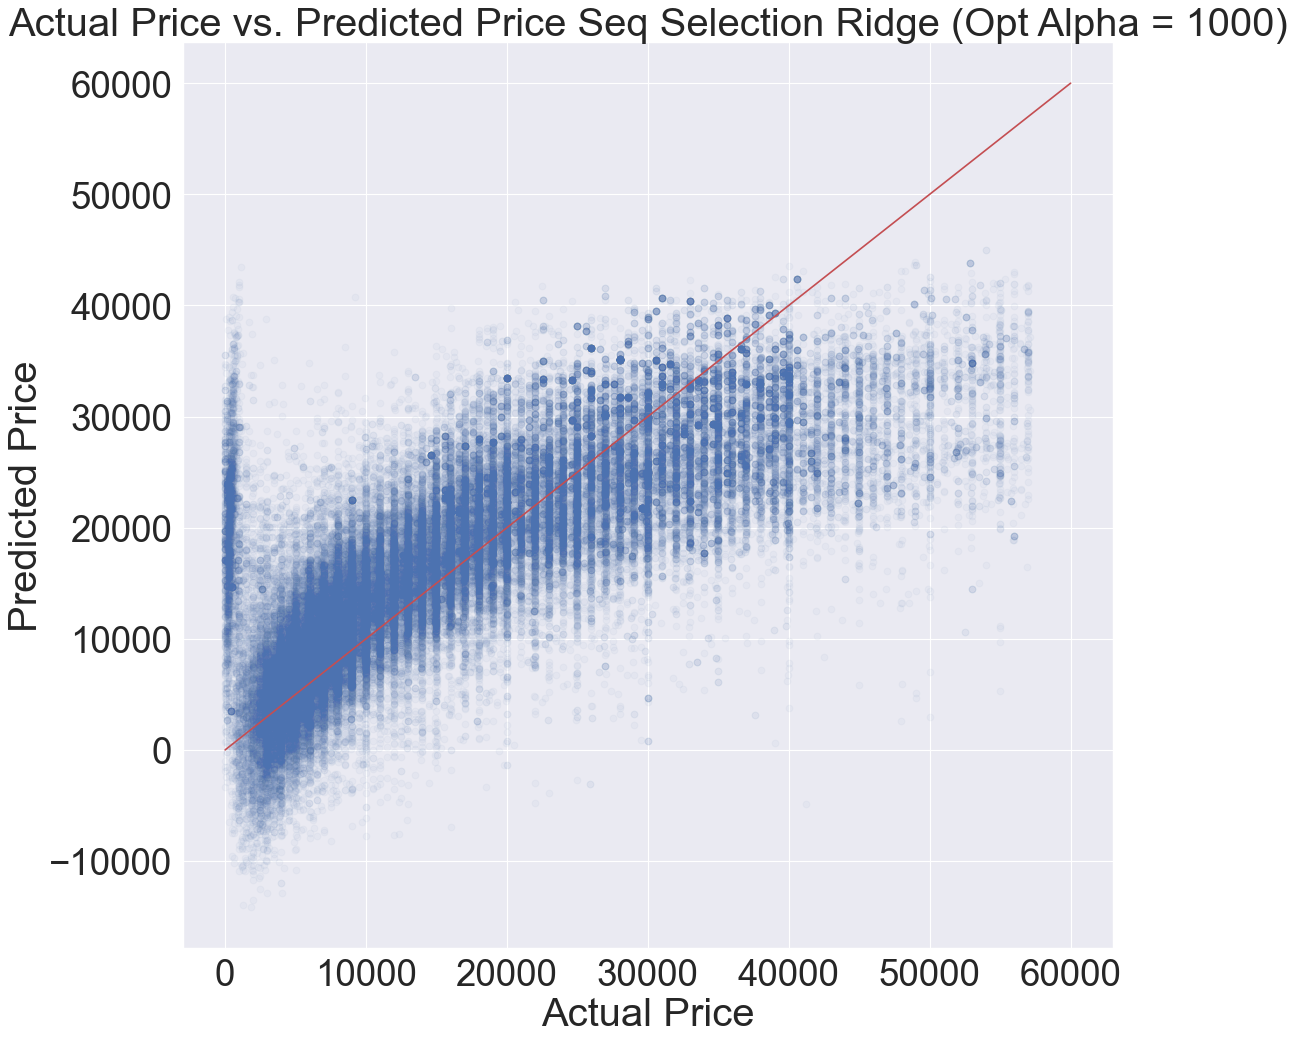

In [112]:
plt.figure(figsize = (15,15), dpi =80)
plt.scatter(x=y_test, y=test_pred3, alpha=0.04)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Seq Selection Ridge (Opt Alpha = 1000)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [88]:
feature_names3 = seq_selector.named_steps["selector"].get_feature_names_out(['region', 'manufacturer', 'model', 'condition',
                       'cylinders', 'fuel', 'title_status', 'transmission',
                       'drive', 'type', 'paint_color', 'state', 'odometer', 'year'])
coefs3 = pd.DataFrame(results3['gridsearchcv'].best_estimator_.regressor_.coef_, columns=["Coefficients"], index = feature_names3)
coefs3.sort_values('Coefficients')

Coefficients
manufacturer     -0.395318
transmission     -0.241654
title_status      0.181450
fuel              0.198418
state             0.237102

Text(0.5, 1.0, 'Model 3 Coefficients')

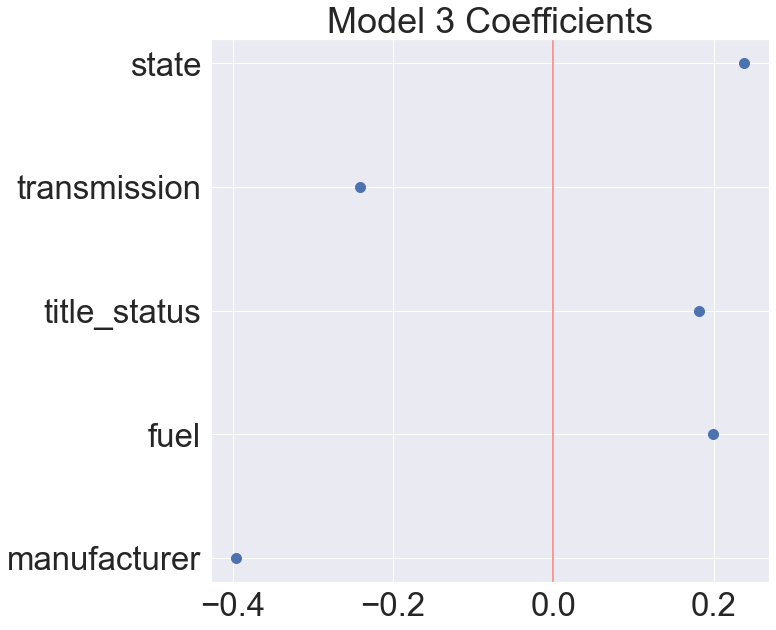

In [113]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(coefs3, coefs3.index, 'o', markersize = 10)
ax.axvline(color = 'salmon')
ax.set_title('Model 3 Coefficients')

In [90]:
r = permutation_importance(results3, X_test, y_test,
                          n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{coefs.index[i]:}"
               f"   {r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

year   2564.218 +/- 12.671
odometer   1128.481 +/- 8.155
type   1007.692 +/- 8.594
cylinders   736.721 +/- 6.448
fuel   479.011 +/- 6.563


## Model 4

###  RandomSearchCV, Target Encoding,  & Random Forest Regression with Standard Scaling

In [92]:
target_preprocessor = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categorical_columns, verbose = 3)),
        ('scaler', StandardScaler())
    ])

random_forest = RandomForestRegressor()

n_estimators = [25, 50, 75, 100]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20]
max_depth.append(None)
min_samples_split = [1, 5, 10, 50, 100]
min_samples_leaf = [1, 5, 10, 50, 100]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameters4 = random_grid

gridsearchcv4 = RandomizedSearchCV(
    random_forest,
    param_distributions=parameters4,
    cv=3,
    scoring=('r2', 'neg_mean_absolute_error'),
    return_train_score=True,
    refit='neg_mean_absolute_error',
    n_jobs=-1,
    verbose = 3,
    n_iter = 20
)

model4 = make_pipeline(target_preprocessor, gridsearchcv4)
model4

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('column_transform',
                                  TargetEncoder(cols=['region', 'manufacturer',
                                                      'model', 'condition',
                                                      'cylinders', 'fuel',
                                                      'title_status',
                                                      'transmission', 'drive',
                                                      'type', 'paint_color',
                                                      'state'],
                                                verbose=3)),
                                 ('scaler', StandardScaler())])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [5, 10,
                                                                       20,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              5,
                                                                              10,
                                                                              50,
                                                                              100],
                                                         'min_samples_split': [1,
                                                                               5,
                                                                               10,
                                                                               50,
                                                                               100],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          75,
                                                                          100]},
                                    refit='neg_mean_absolute_error',
                                    return_train_score=True,
                                    scoring=('r2', 'neg_mean_absolute_error'),
                                    verbose=3))])

In [93]:
results4 = model4.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [94]:
print(results4['randomizedsearchcv'].best_params_)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [95]:
train_pred4 = results4.predict(X_train)
train_mse4 = mean_squared_error(y_train, train_pred4)
test_pred4 = results4.predict(X_test)
test_mse4 = mean_squared_error(y_test, test_pred4)

In [96]:
print(f"R2: {r2_score(y_test, test_pred4)*100:.4}%")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, test_pred4):.6}")
print(f"Root Mean Square Training Error: ${np.sqrt(train_mse4):.6}\nRoot Mean Square Testing Error: ${np.sqrt(test_mse4):.6}")

R2: 89.49%
Mean Absolute Error: $2229.48
Root Mean Square Training Error: $2153.66
Root Mean Square Testing Error: $4124.54


Text(0, 0.5, 'Predicted Price')

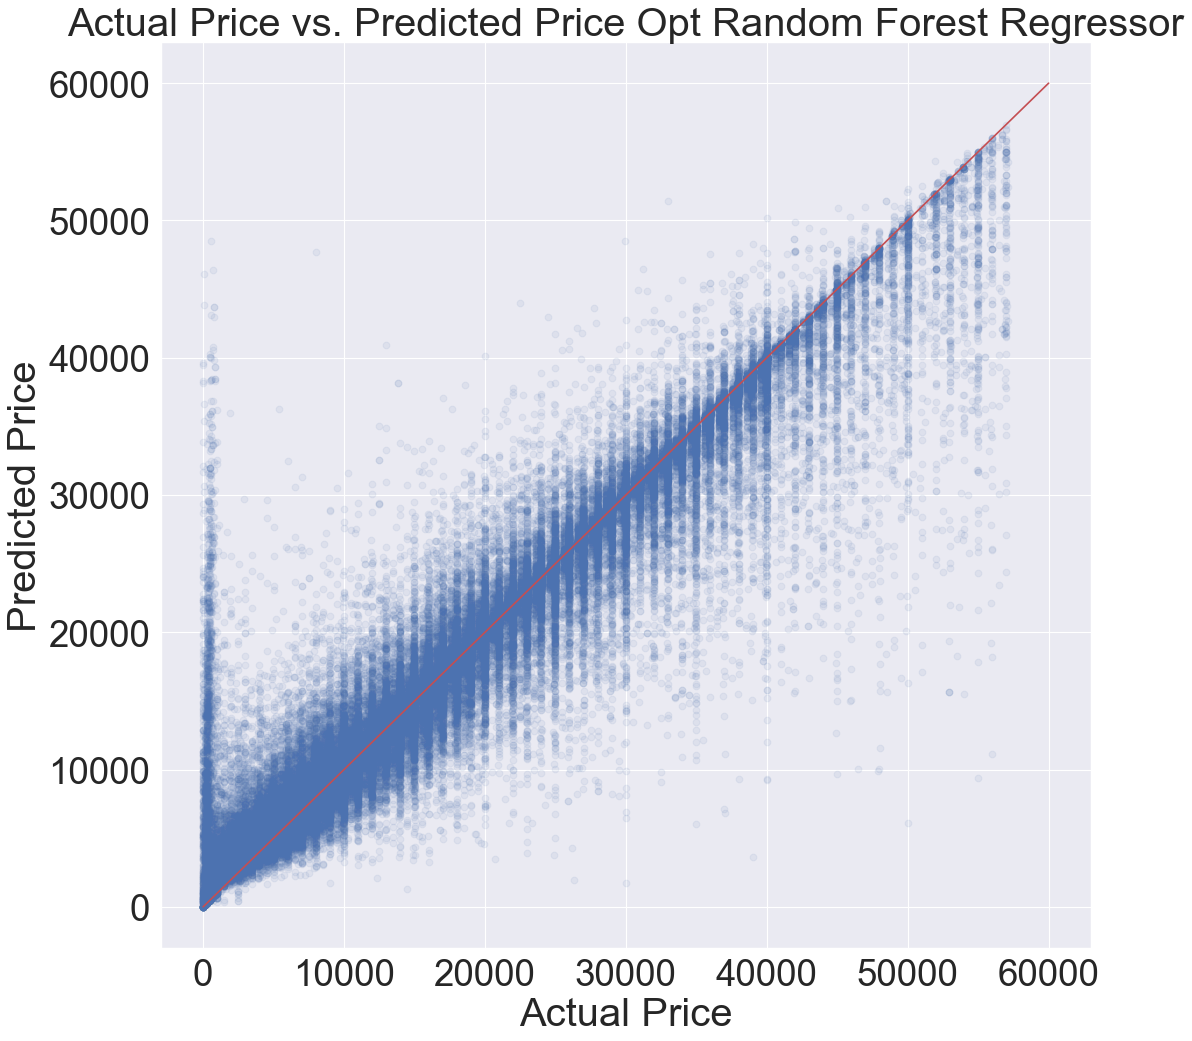

In [111]:
plt.figure(figsize = (15,15), dpi =80)
plt.scatter(x=y_test, y=test_pred4, alpha=0.08)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Opt Random Forest Regressor")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [98]:
results4['randomizedsearchcv'].cv_results_

{'mean_fit_time': array([7.51445111e+00, 3.78741249e+01, 2.63444239e+01, 2.75568194e+01,
        2.40329666e+01, 4.42945738e+01, 1.60964886e-01, 2.83900570e+01,
        5.59152269e+01, 1.66324511e+02, 4.06341015e+01, 1.92991734e-01,
        1.13859379e+02, 9.78810438e+00, 2.78712677e+01, 1.52414819e+01,
        5.05406992e+00, 1.70594056e-01, 2.73803031e+01, 1.92860683e-01]),
 'std_fit_time': array([0.14545363, 0.02430693, 0.03400532, 0.1749156 , 0.05783851,
        0.2119234 , 0.01881969, 0.06697206, 0.16017523, 0.32197485,
        0.17056635, 0.01267763, 0.22742385, 0.11491675, 0.02135823,
        0.09819444, 0.04536135, 0.01225937, 0.16808873, 0.00265519]),
 'mean_score_time': array([0.23973505, 3.67620897, 0.21348381, 0.8607343 , 0.19957225,
        3.20474736, 0.        , 0.38279239, 0.78154445, 1.55900796,
        2.70087488, 0.        , 1.06366571, 0.31829   , 0.47729143,
        0.59861867, 0.20152823, 0.        , 1.76710153, 0.        ]),
 'std_score_time': array([0.02246847, 

In [99]:
data4 = pd.DataFrame(results4['randomizedsearchcv'].best_estimator_.feature_importances_, columns=["Importances"], index = X.columns)
data4 = data4.sort_values('Importances', ascending = False)
data4.Importances = data4.Importances.astype(float)
data4

Importances
year             0.253259
odometer         0.225866
type             0.099847
fuel             0.062092
drive            0.057289
cylinders        0.056840
model            0.053106
manufacturer     0.041433
transmission     0.040661
state            0.033018
condition        0.023945
paint_color      0.023175
region           0.019405
title_status     0.010062

<BarContainer object of 14 artists>

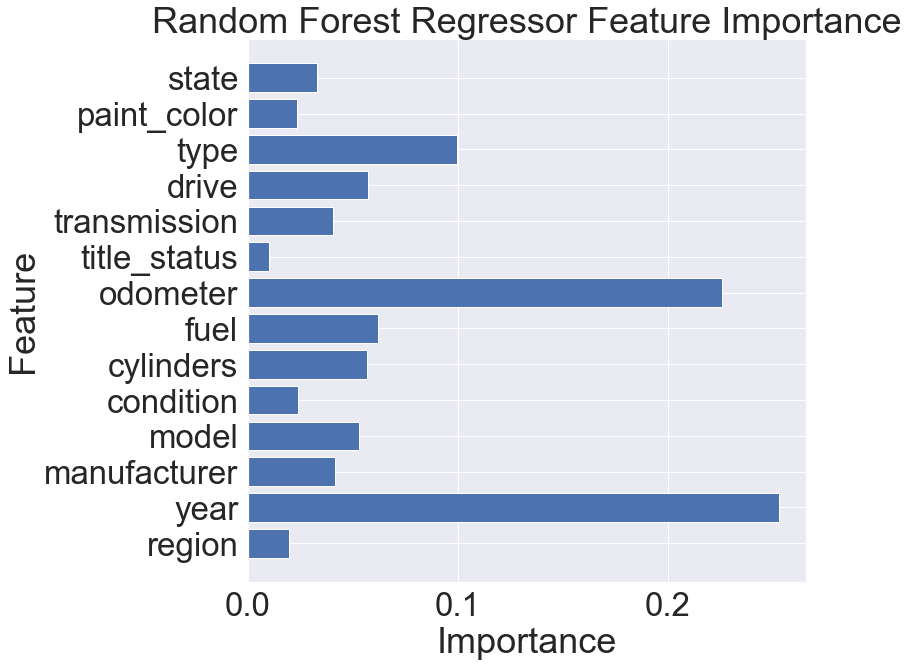

In [119]:
plt.figure(figsize = (10,10))
plt.title("Random Forest Regressor Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.barh(X.columns, results4['randomizedsearchcv'].best_estimator_.feature_importances_)

# Evaluation

## Model Selection

## Feature Importance

- All models concur that the most important feature is year
- Odometer is in the second most important feature in 3/4 models
- Type is in the top 3 features in 3/4 models
- Fuel is in the top 5 features in all 4 models
- Cylinders and perhpas model are the only remaining feature that carrys any significant remaining effect

## Data Integrity

In [125]:
cars.shape

(426880, 18)

In [106]:
prepped_cars.shape

(364068, 15)

In [131]:
364068/426880*100

85.28579460269864

In [109]:
prepped_cars.isnull().sum()/364068*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       38.192590
cylinders       41.043157
fuel             0.569948
odometer         0.000000
title_status     1.915302
transmission     0.392784
drive           30.477823
type            20.912302
paint_color     29.367591
state            0.000000
dtype: float64

In [123]:
prepped_cars.isnull().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       139047
cylinders       149425
fuel              2075
odometer             0
title_status      6973
transmission      1430
drive           110960
type             76135
paint_color     106918
state                0
dtype: int64

In [128]:
a = prepped_cars.isnull().sum().sum()
a

592963

In [129]:
b = cars.isnull().sum().sum()
b

1215152

In [130]:
a/b*100

48.79743439503865

 - Above are the project results regarding the data preparation, tranformation, removal, and resultant percentages are shown with a focus on the remaining null data.
 
 - The final dataset titled prepped_cars represents 85.29% of the original dataset yet only has 48.80% of the null values compared to the original dataset. It is the projects team's professional opinion that removing approximately 15% of the original dataset to decrease the amout of missing data by 51.2% is a reasonable trade-off. 
 
- It is also the project team's professional opinion that fundamental changes to the underlying distributions of the following categorical features would occur if the project simply replaced the missing values with the most frequent categorical value: conidition, cylinders, drive, type, and paint_color.

- These fundamental changes could result in a scenario where the learning algoirithms would demonstrate improved accuracy and decreased training and testing error. 

- However, this "improved performance" on a dataset that has been grossly manipulated would be poorly generalizable from a deployment perspective and could result in a model that is much less robust to actual real-world practices.

- A firm recommendation from the project team is for the dealership to devote resources to improve data collection with the goal of improving future data projects.

- However, since the current data project was able to create a model with a R2 of approximately 90%, such an intervention may not be neccesary as long as current data collection practices produce similar datasets in the future.

- Indeed, a Random Forest algorithm is known to handle datasets that are both non-linear and categorical well. This supervised machine learning project demonstrated the limits of multiple regression and the strengths of ensemble methodolgy due to the numerous categorical features and missing values of the dataset.

# Deployment

## Deployment Plan

- The model will be deployed as a web application on a local dealership machine so that the client's dealership managers or assigned staff can competitively price their used car inventory or make appropriate offers when offering trade-in value.
- The model's pricing recommendation will be contrasted with the dealership's usual process of pricing inventory.
- Depending on how investigative the dealership would like to become concerning the model's robustness, the dealership could opt for control and treatment groups. Where the control group are dealerships that continue to use current pricing practices and the treatment group are dealerships that adheres only to the model. 
- A between groups analysis can be performed after a pre-determined period of time and appropriate metrics such as profit, volume, lot time, repeat customer, etc., could be evaluated to measure any model effect between the control and treatment groups.
- The general manager can notify their regional manager of any gross inaccuracies between the model and the actual sale price, overrule the model's recommendation, and a detailed report will be collected and forwarded to the chief information/analytics officer for further review, monitoring, and data mining engagement.